<a href="https://colab.research.google.com/github/jaramillooo/proyecto_modulo1/blob/main/proyectoModulo1_JaramilloA_AvilaK_MurguiaM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___
<img style="float: left; margin: 30px 15px 15px 15px;" src="https://d33wubrfki0l68.cloudfront.net/4ec62c1c925a380c912ddad740d18554c6822a11/fabe4/img/sponsors/iteso-university.png" width="300" height="500" />

**Nombres:**
- Kaleb Azael Avila Padilla
- Axel Cabrera Jaramillo
- Manuel Alejandro Murguía Orantes

**Expediente**:
- 724405
- 730793
- 739360

**Fecha:** 09 de mayo del 2024.

**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/jaramillooo/proyecto_modulo1

<div style="text-align: justify">

## 1.1 Proyecto Final de Modelos no Lineales para Pronósticos

### 1.2 Objetivos.

> #### 1.1 Objetivo general.
> Primer Dataset
>  - Desarrollar modelos de predicción de series de tiempo para prever la demanda diaria de pedidos en una empresa brasileña de logística utilizando técnicas tanto lineales como no lineales.
>
> Segundo Dataset
>  - Desarrollar modelos de clasificación de series de tiempo para detectar la ocupación de una habitación utilizando el dataset "Occupancy Detection".

> #### 1.2 Objetivos específicos
> Primer Dataset
>  - Implementar un modelo SARIMAX para prever la demanda diaria de pedidos y evaluar su desempeño utilizando métricas de evaluación adecuadas, como el error cuadrático medio (MSE) o el error absoluto medio (MAE).
>  - Experimentar con modelos no lineales como redes neuronales MLP (Perceptrón Multicapa) y evaluar su capacidad para predecir la demanda diaria de pedidos en comparación con SARIMAX.
>  - Implementar técnicas de aprendizaje profundo (vistas en clase) como redes neuronales convolucionales (CNN) y redes neuronales de memoria a largo plazo (LSTM) para modelar la demanda diaria de pedidos y comparar su rendimiento con los modelos lineales y el MLP.
> 
> Segundo Dataset
>  - Implementar un modelo de clasificación de series de tiempo, como un clasificador basado en series temporales (por ejemplo, un clasificador K-Nearest Neighbors temporal), utilizando las características temporales del dataset para predecir la ocupación de la habitación en cada momento.
>  - Experimentar con diferentes algoritmos de clasificación de series de tiempo, como modelos de árboles de decisión, SVM (Support Vector Machines) y redes neuronales recurrentes (por ejemplo, LSTM), para comparar su desempeño con el clasificador basado en series temporales inicial.

### 1.3 Definición del problema.

> Primer Daset
>  - El problema principal asociado con el dataset "Daily Demand Forecasting Orders" es la predicción de la demanda diaria de pedidos en una empresa de logística brasileña. Los desafíos específicos incluyen la complejidad temporal debido a factores como la estacionalidad y las tendencias a largo plazo, la variabilidad de los datos debido a la incertidumbre en el comportamiento del consumidor, y la necesidad de seleccionar y ajustar modelos adecuados, como SARIMAX y modelos de aprendizaje profundo, para capturar eficazmente la complejidad temporal y predecir con precisión la demanda futura.
>
> Segundo Dataset
>  - El problema principal asociado con el dataset "Occupancy Detection" es la detección de la ocupación de una habitación en función de datos ambientales. Los desafíos específicos incluyen la interpretación de los datos ambientales, el desequilibrio de clases en las etiquetas de ocupación y no ocupación, la captura de patrones temporales si están presentes en los datos, y la selección de características relevantes para mejorar la precisión de la detección de ocupación. Abordar estos problemas requerirá un enfoque cuidadoso en la exploración de datos, el preprocesamiento, la selección de modelos y la evaluación del rendimiento, adaptados a las características específicas de cada conjunto de datos y el problema en cuestión.

### 1.5 Obtención de bases de datos
> Ambas bases de datos se obtuvieron de la siguiente [página](https://archive.ics.uci.edu)
</div>

## Parte 1 - Predicción de Serie de Tiempo Lineal

### Daily Demand Forecasting Orders

#### [Link del Dataset](https://archive.ics.uci.edu/dataset/409/daily+demand+forecasting+orders).

Variables:
- Week of the month	Feature	Integer	(first, second, third, fourth or fifth week) -> {1.0, 2.0, 3.0, 4.0, 5.0}
- Day of the week (Monday to Friday) -> {2.0, 3.0, 4.0, 5.0, 6.0}
- Non-urgent order
- Urgent order
- Order type A
- Order type B
- Order type C
- Fiscal sector orders
- Orders from the traffic controller sector
- Banking orders (1)
- Banking orders (2)
- Banking orders (3)

Total_orders -> Target

In [1]:
pip install ucimlrepo

^C


#### Librerias

In [162]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import timedelta
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import MSTL
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")


#### Datos

In [172]:
# dataset
daily_demand_forecasting_orders = fetch_ucirepo(id=409)
X = daily_demand_forecasting_orders.data.features
y = daily_demand_forecasting_orders.data.targets
print(daily_demand_forecasting_orders.metadata),print(daily_demand_forecasting_orders.variables)

{'uci_id': 409, 'name': 'Daily Demand Forecasting Orders', 'repository_url': 'https://archive.ics.uci.edu/dataset/409/daily+demand+forecasting+orders', 'data_url': 'https://archive.ics.uci.edu/static/public/409/data.csv', 'abstract': 'The dataset was collected during 60 days, this is a real database of a brazilian logistics company.', 'area': 'Business', 'tasks': ['Regression'], 'characteristics': ['Time-Series'], 'num_instances': 60, 'num_features': 12, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Total orders'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2016, 'last_updated': 'Thu Mar 21 2024', 'dataset_doi': '10.24432/C5BC8T', 'creators': ['Ricardo Ferreira', 'Andrea Martiniano', 'Arthur Ferreira', 'Aleister Ferreira', 'Renato Sassi'], 'intro_paper': {'title': 'Study on Daily Demand Forecasting Orders using Artificial Neural Network', 'authors': 'R. P. Ferreira, Andréa Martiniano, Arthur Arruda Leal 

(None, None)

#### EDA

In [4]:
X.head()

,Week of the month,Day of the week,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257


Despues de la obtención de los datos vamos a hacer nuestra variable de tiempo para poder trabajar en nuestros analísis y modelos.

In [164]:
X['Datetime'] = pd.to_datetime((X['Week of the month'] - 1) * 7 + X['Day of the week'] - 2, unit='W', origin='2022-01-01')
# adjust the date range to 60 days
X['Datetime'] = X['Datetime'] - pd.Timedelta(days=7)
X.drop(['Week of the month', 'Day of the week'], axis=1, inplace=True)
ds = X.copy()
X.set_index('Datetime', inplace=True)

In [165]:
X.dtypes

Non-urgent order                             float64
Urgent order                                 float64
Order type A                                 float64
Order type B                                 float64
Order type C                                 float64
Fiscal sector orders                         float64
Orders from the traffic controller sector      int64
Banking orders (1)                             int64
Banking orders (2)                             int64
Banking orders (3)                             int64
dtype: object

Vermos las ordenes que hay dentro del data set y de ahí sumar todas para tomarla como la variable objetivo.

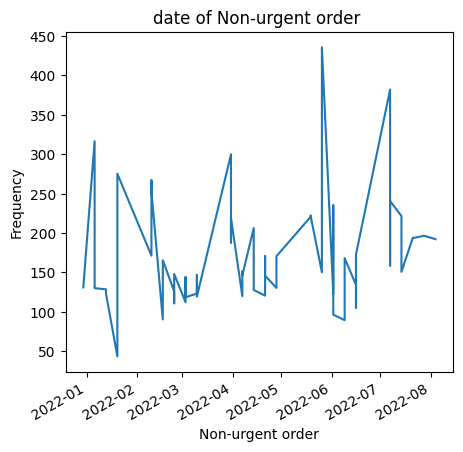

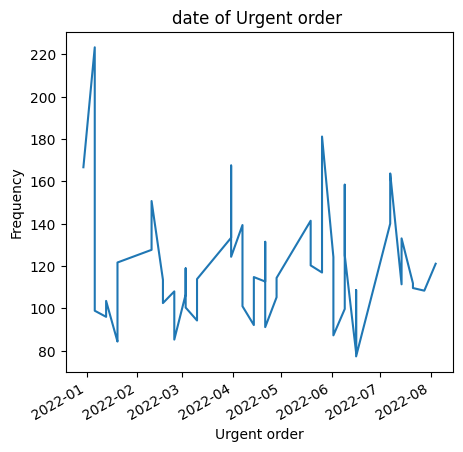

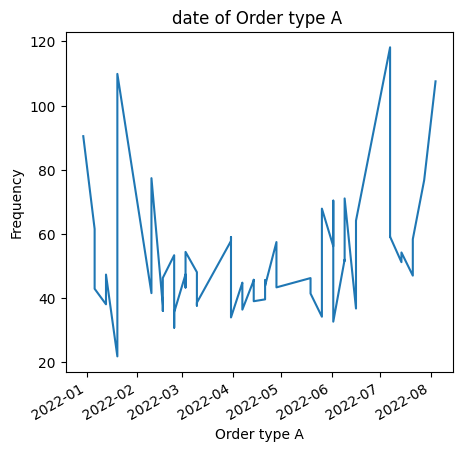

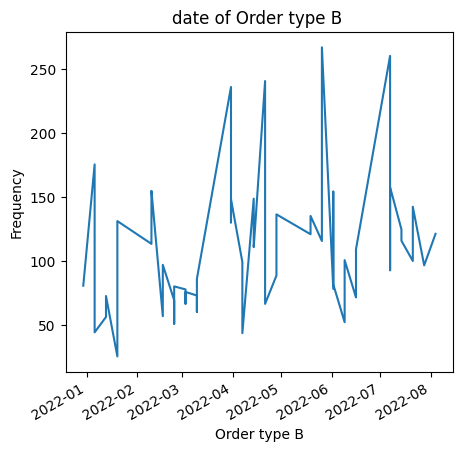

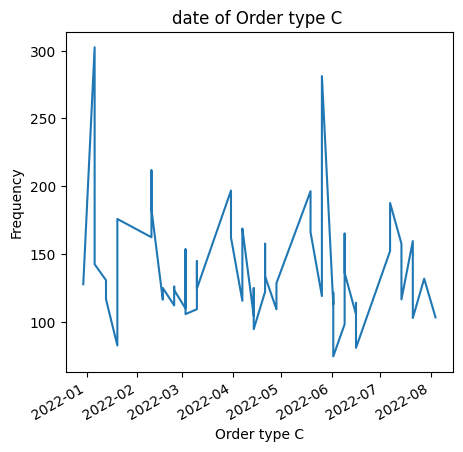

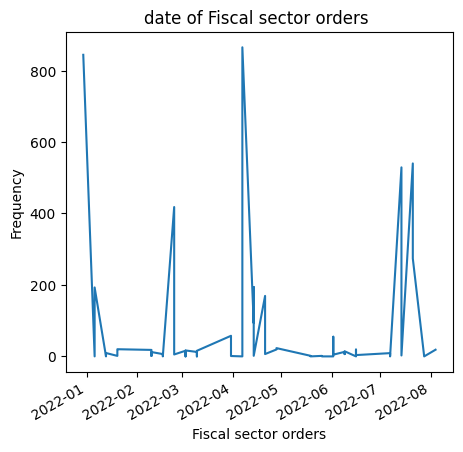

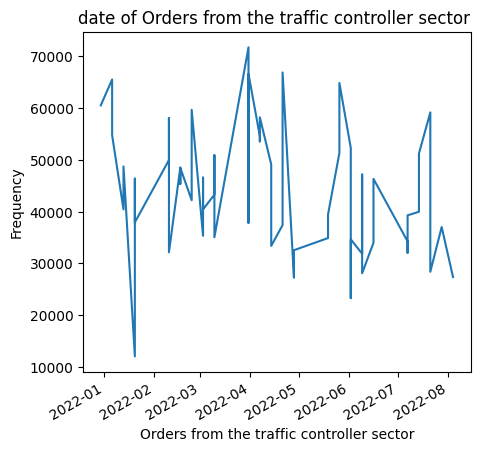

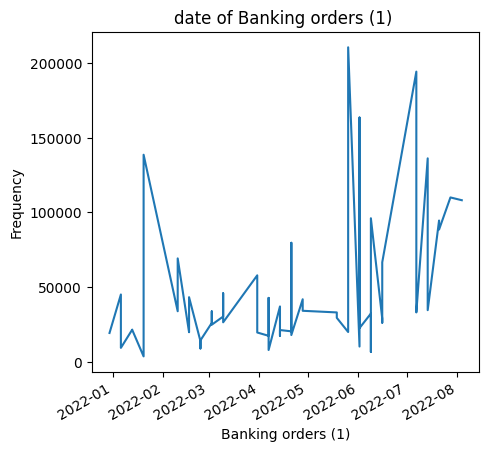

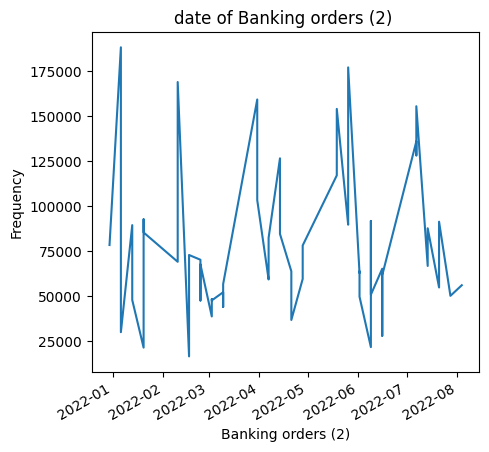

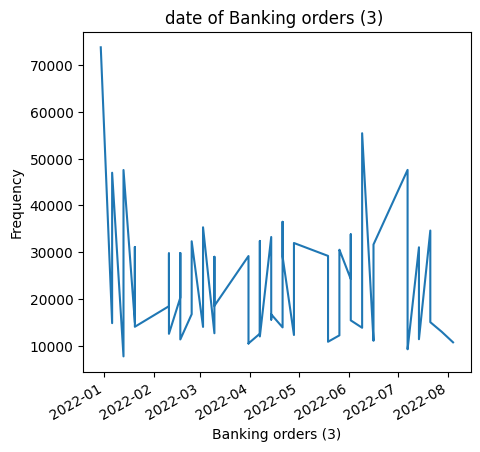

In [7]:
columns_to_plot = [col for col in X.columns if col != 'Datetime']
for col in columns_to_plot:
    plt.figure(figsize=(5, 5))
    X[col].plot()
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"date of {col} ")
    plt.show()

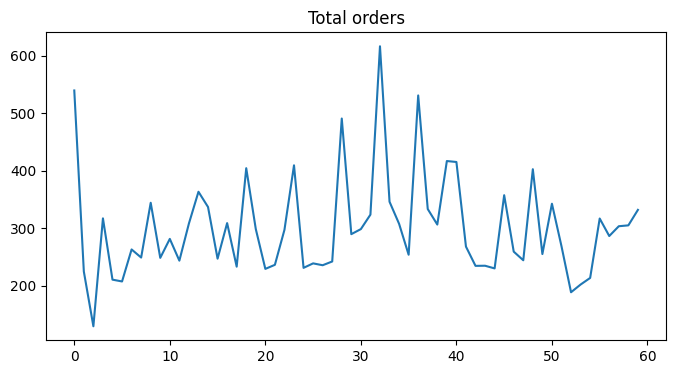

In [8]:
y['Total orders'].plot(kind='line', figsize=(8, 4), title='Total orders')
plt.gca().spines[['top', 'right']].set_visible(True)

In [166]:
_ = pd.DataFrame({
    'Datetime': ds['Datetime'],
    'Total orders': y['Total orders']
})
data = _.set_index('Datetime')
data.head(10)

,Total orders
Datetime,
2022-01-06,539.577
2022-01-13,224.675
2022-01-20,129.412
2022-02-10,317.120
2022-02-17,210.517
2022-02-24,207.364
2022-03-03,263.043
2022-03-10,248.958
2022-03-31,344.291


Vamos a analízar nuestros datos para ver si son estacionarios o no y de ahí pasar a más analisis de estos para ver como funcionarian mejor con los modelos.

<Axes: xlabel='Datetime'>

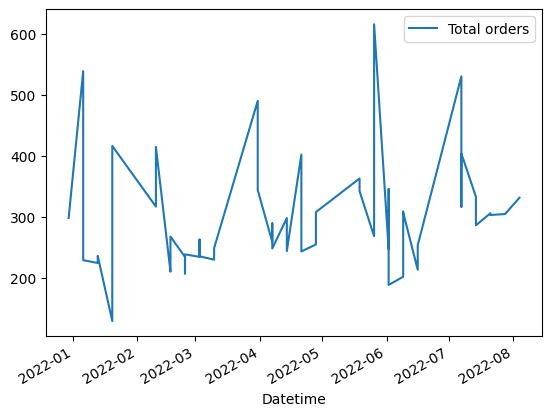

In [10]:
data.plot()

Hicimos un resample de los datos para que nos diera la freciencia por semanas de los datos para poder trabajar y analisarlos mejor.

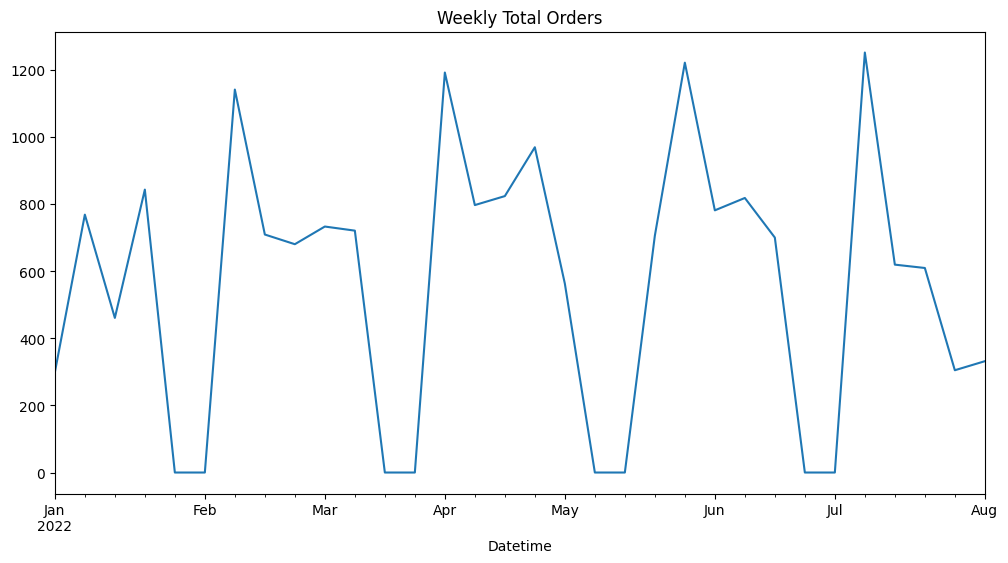

In [11]:
days = data.resample('W')['Total orders'].sum()
days.plot(figsize=(12, 6))
plt.title('Weekly Total Orders')
plt.show()

In [12]:
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from io import BytesIO

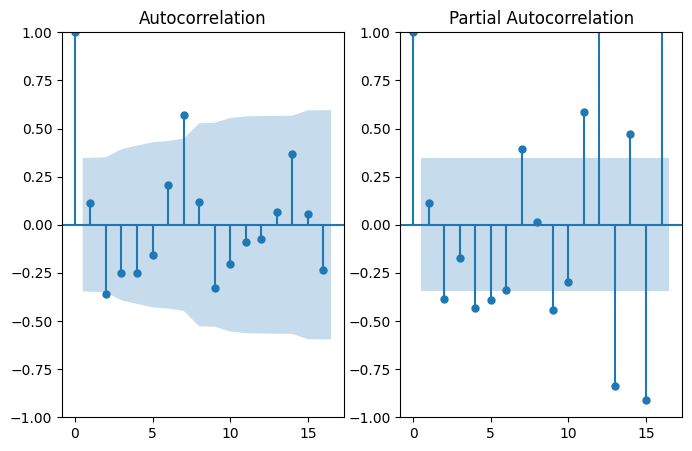

In [13]:
# 1. Graficar ACF y PACF
f = plt.figure(figsize=(8,5))

ax1 = f.add_subplot(121)

plot_acf(days, ax=ax1)

ax2 = f.add_subplot(122)
plot_pacf(days, ax=ax2, method='ols')

plt.show()

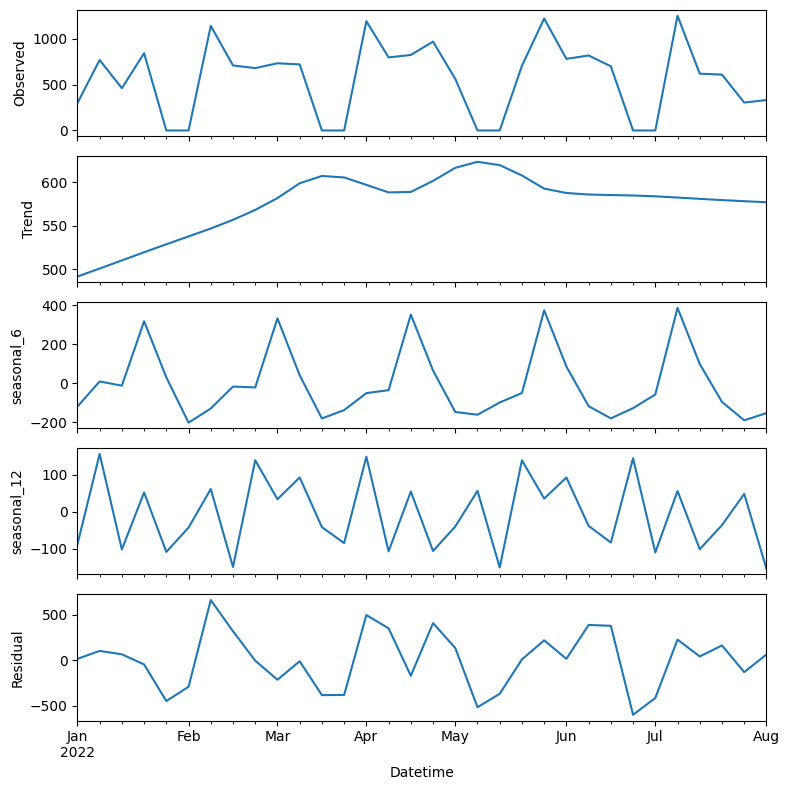

In [14]:
# Función para análisis de estacionalidad
from statsmodels.tsa.seasonal import MSTL
import matplotlib.pyplot as plt

data1 = days.copy()
periods_seasonality = (6, 12)

stl_kwargs = {"seasonal_deg": 0}
model = MSTL(data1, periods=periods_seasonality, stl_kwargs=stl_kwargs)
res2 = model.fit()

# Gráfica de descomposición
fig, ax = plt.subplots(5, 1, sharex=True, figsize=(8, 8))

res2.observed.plot(ax=ax[0])
ax[0].set_ylabel('Observed')

res2.trend.plot(ax=ax[1])
ax[1].set_ylabel('Trend')

res2.seasonal[f'seasonal_{periods_seasonality[0]}'].plot(ax=ax[2])
ax[2].set_ylabel(f'seasonal_{periods_seasonality[0]}')

res2.seasonal[f'seasonal_{periods_seasonality[1]}'].plot(ax=ax[3])
ax[3].set_ylabel(f'seasonal_{periods_seasonality[1]}')

res2.resid.plot(ax=ax[4])
ax[4].set_ylabel('Residual')

fig.tight_layout()

In [15]:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

    if (dftest[1] <= 0.05) & (dftest[4]['5%'] > dftest[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [16]:
adf_test(days)

Results of Dickey-Fuller Test:
Test Statistic                 -1.507899
p-value                         0.529600
#Lags Used                     10.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64
Non-stationary


In [17]:
adf_test(days.diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                -8.537604e+00
p-value                        9.981672e-14
#Lags Used                     5.000000e+00
Number of Observations Used    2.500000e+01
Critical Value (1%)           -3.723863e+00
Critical Value (5%)           -2.986489e+00
Critical Value (10%)          -2.632800e+00
dtype: float64
Stationary


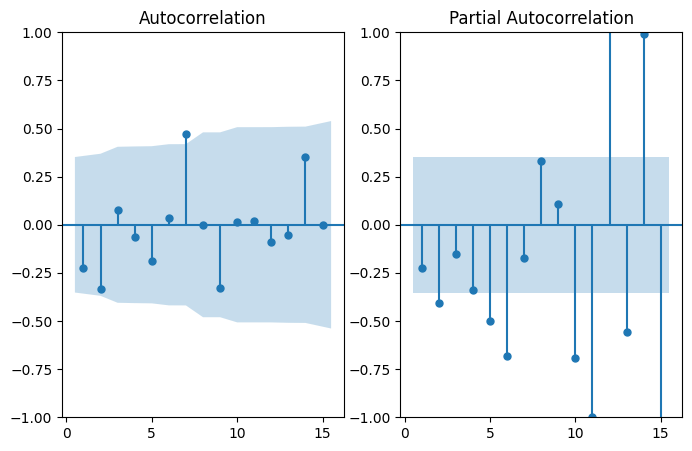

In [18]:

def plot_acf_pacf(data, kwargs=dict()):
    f = plt.figure(figsize=(8,5))

    ax1 = f.add_subplot(121)

    plot_acf(data, zero=False, ax=ax1, **kwargs)

    ax2 = f.add_subplot(122)
    plot_pacf(data, zero=False, ax=ax2, method='ols', **kwargs)

    plt.show()

plot_acf_pacf(days.diff().dropna(), {'lags':15})

#### Modelos

In [19]:
from statsmodels.tsa.arima.model import ARIMA
arima_model1 = ARIMA(days, order=(8, 2, 2))
model1 = arima_model1.fit()
print(model1.summary())

                               SARIMAX Results                                
Dep. Variable:           Total orders   No. Observations:                   32
Model:                 ARIMA(8, 2, 2)   Log Likelihood                -215.061
Date:                Thu, 09 May 2024   AIC                            452.123
Time:                        19:33:29   BIC                            467.536
Sample:                    01-02-2022   HQIC                           457.054
                         - 08-07-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9544      1.876     -0.509      0.611      -4.631       2.722
ar.L2         -0.8509      2.567     -0.331      0.740      -5.883       4.181
ar.L3         -0.6763      2.909     -0.232      0.8

<Axes: xlabel='Datetime'>

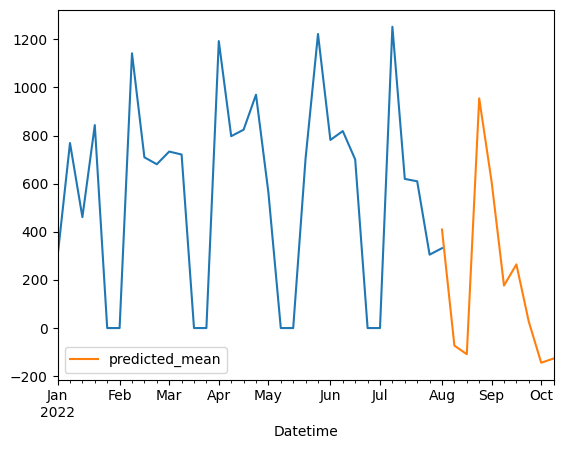

In [20]:
y_h = model1.predict(start=31, end=40, dynamic=False).to_frame()

ax = days.plot()

y_h.plot(ax=ax)

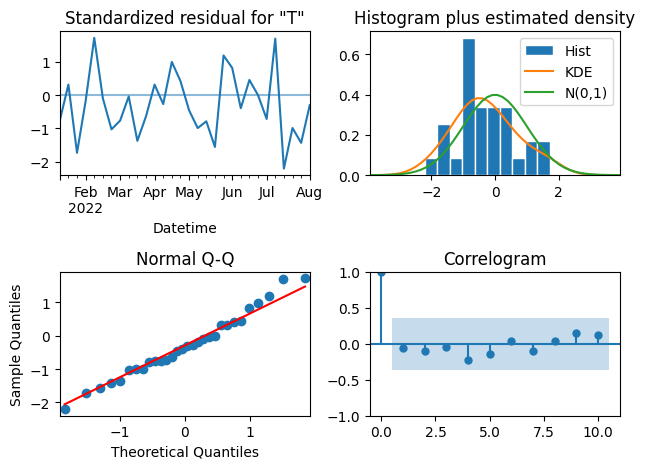

In [21]:
model1.plot_diagnostics()
plt.tight_layout();

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.2 MB/s eta 0:00:00
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -234.227
Date:                Thu, 09 May 2024   AIC                            476.454
Time:                        19:34:40   BIC                            482.316
Sample:                    01-02-2022   HQIC                           478.397
                         - 08-07-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    693.2419    133.424      5.196      0.000     431.736     954.747
ar.L1          0.1542      0.192      0.801      0.42

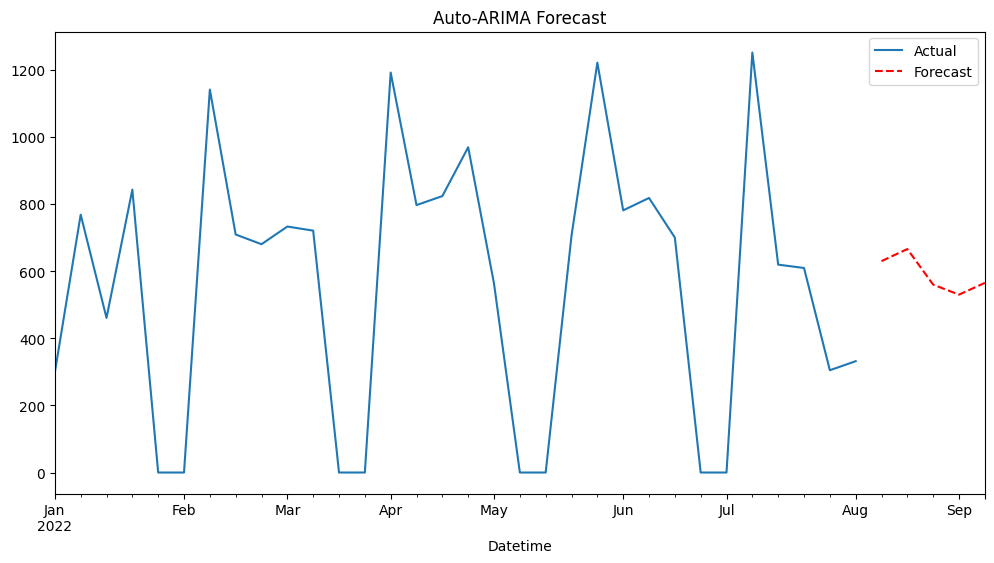

In [23]:
import pandas as pd
!pip install pmdarima
import pmdarima as pm
from pmdarima import model_selection

model = pm.auto_arima(days, start_p=3, start_q=0, start_P=1, start_Q=1,
                     max_p=5, max_q=5, max_P=5, max_Q=5, seasonal=True,
                     stepwise=True, suppress_warnings=True, D=7, max_D=10,
                     error_action='ignore')
print(model.summary())
forecast = model.predict(n_periods=5)
days.plot(figsize=(12, 6), label='Actual')
forecast.plot(color='red', linestyle='--', label='Forecast')
plt.legend()
plt.title('Auto-ARIMA Forecast')
plt.show()

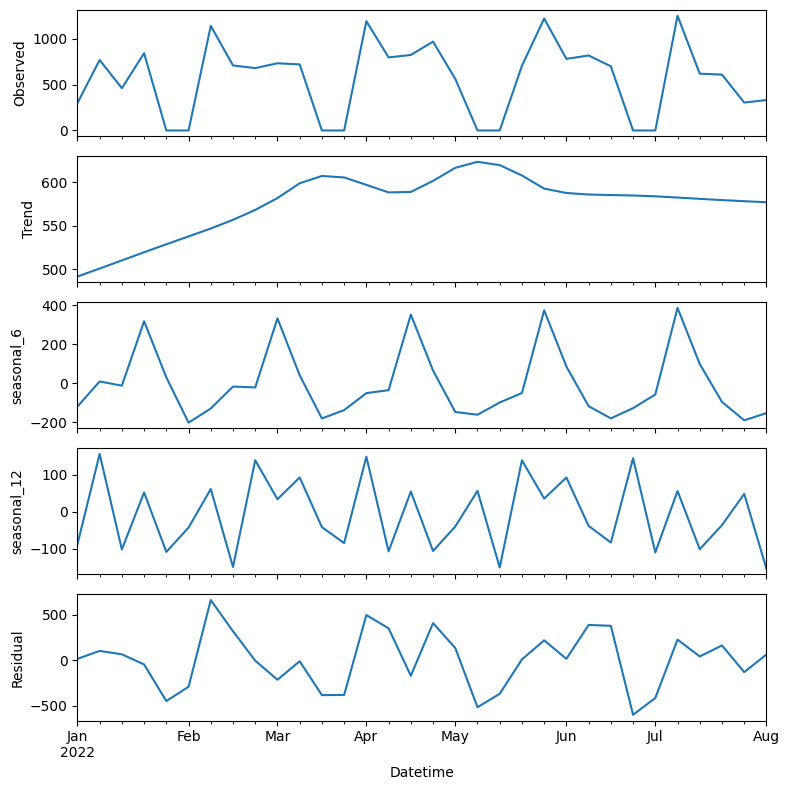

In [24]:
# Función para análisis de estacionalidad
from statsmodels.tsa.seasonal import MSTL
import matplotlib.pyplot as plt

periods_seasonality = (6,12)

stl_kwargs = {"seasonal_deg": 0}
model = MSTL(days, periods=(periods_seasonality), stl_kwargs=stl_kwargs)
res2 = model.fit()

# Gráfica de descomposición
fig, ax = plt.subplots(5, 1, sharex=True, figsize=(8, 8))

res2.observed.plot(ax=ax[0])
ax[0].set_ylabel('Observed')

res2.trend.plot(ax=ax[1])
ax[1].set_ylabel('Trend')

res2.seasonal[f'seasonal_{periods_seasonality[0]}'].plot(ax=ax[2])
ax[2].set_ylabel(f'seasonal_{periods_seasonality[0]}')

res2.seasonal[f'seasonal_{periods_seasonality[1]}'].plot(ax=ax[3])
ax[3].set_ylabel(f'seasonal_{periods_seasonality[1]}')

res2.resid.plot(ax=ax[4])
ax[4].set_ylabel('Residual')

fig.tight_layout()

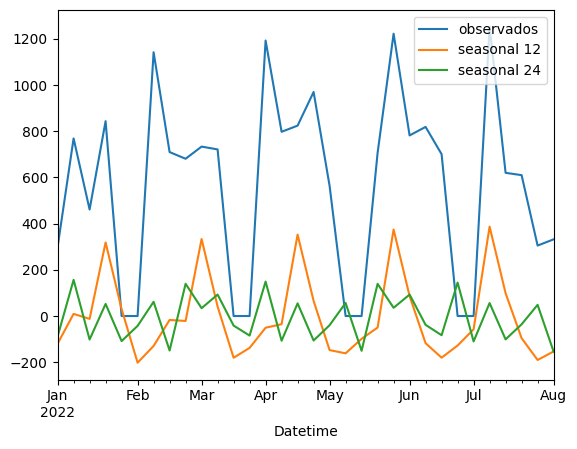

In [25]:
# Graficar datos observados con datos de estacionalidad
ax = res2.observed.plot(label='observados')

res2.seasonal['seasonal_6'].plot(ax=ax, label='seasonal 12')
res2.seasonal['seasonal_12'].plot(ax=ax, label='seasonal 24')

plt.legend()
plt.show()

## Parte 2 - Modelos de regresión con CNN-LSTM y MLP

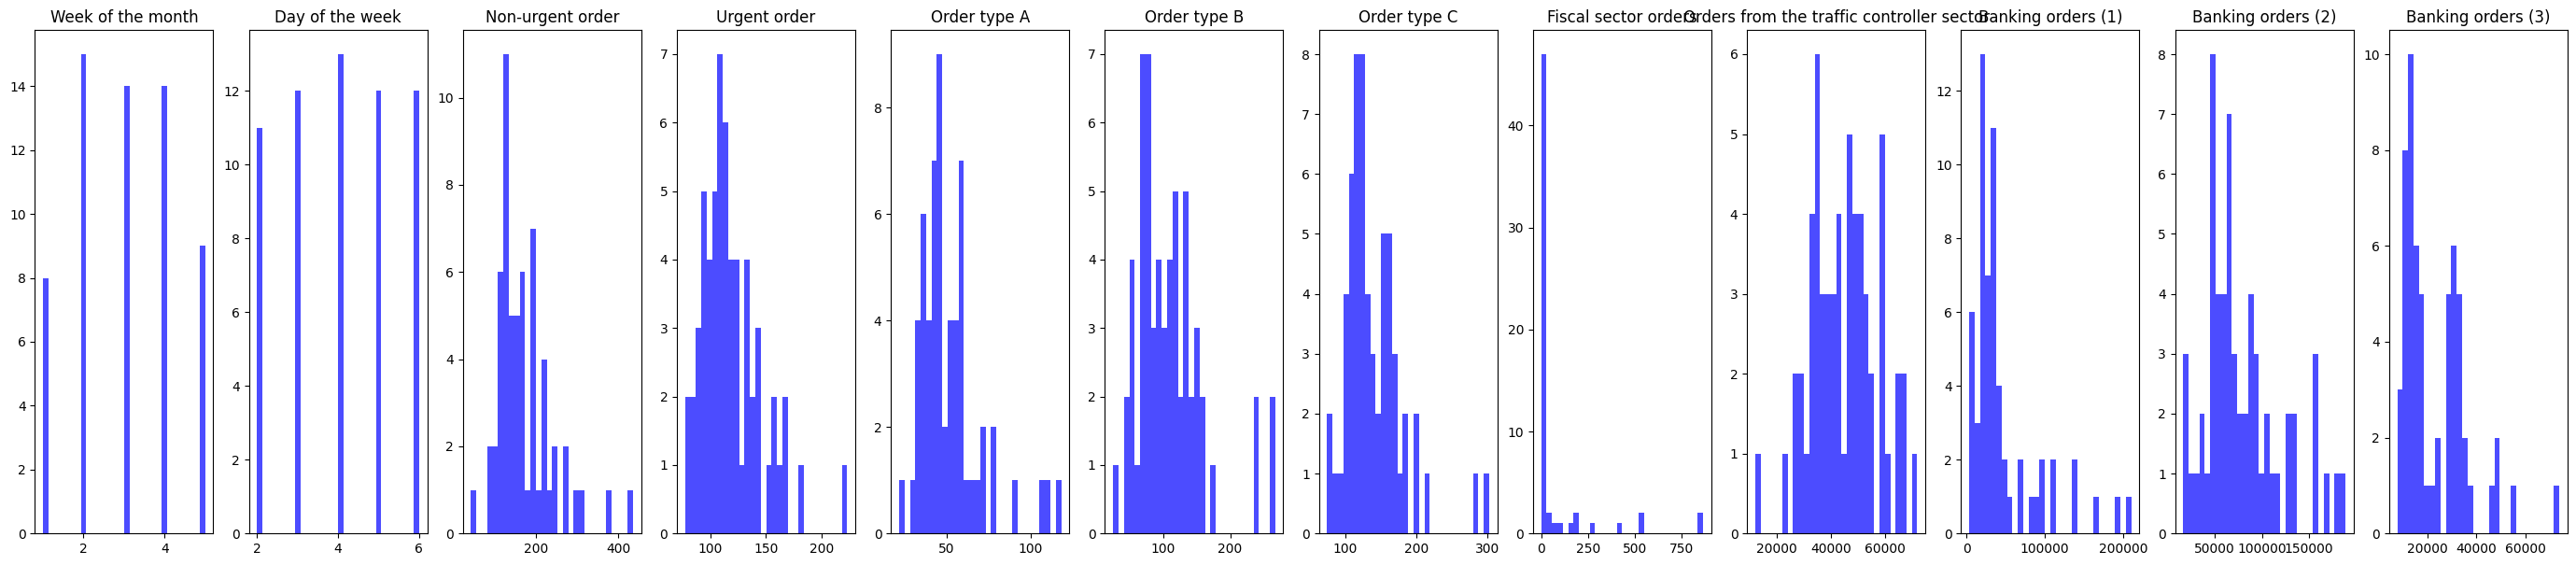

In [173]:
num_cols = len(X.columns)
fig, axs = plt.subplots(1, num_cols, figsize=(35, 7))

for i, col in enumerate(X.columns):
    axs[i].hist(X[col], bins=30, color='blue', alpha=0.7)
    axs[i].set_title(col)


plt.show()

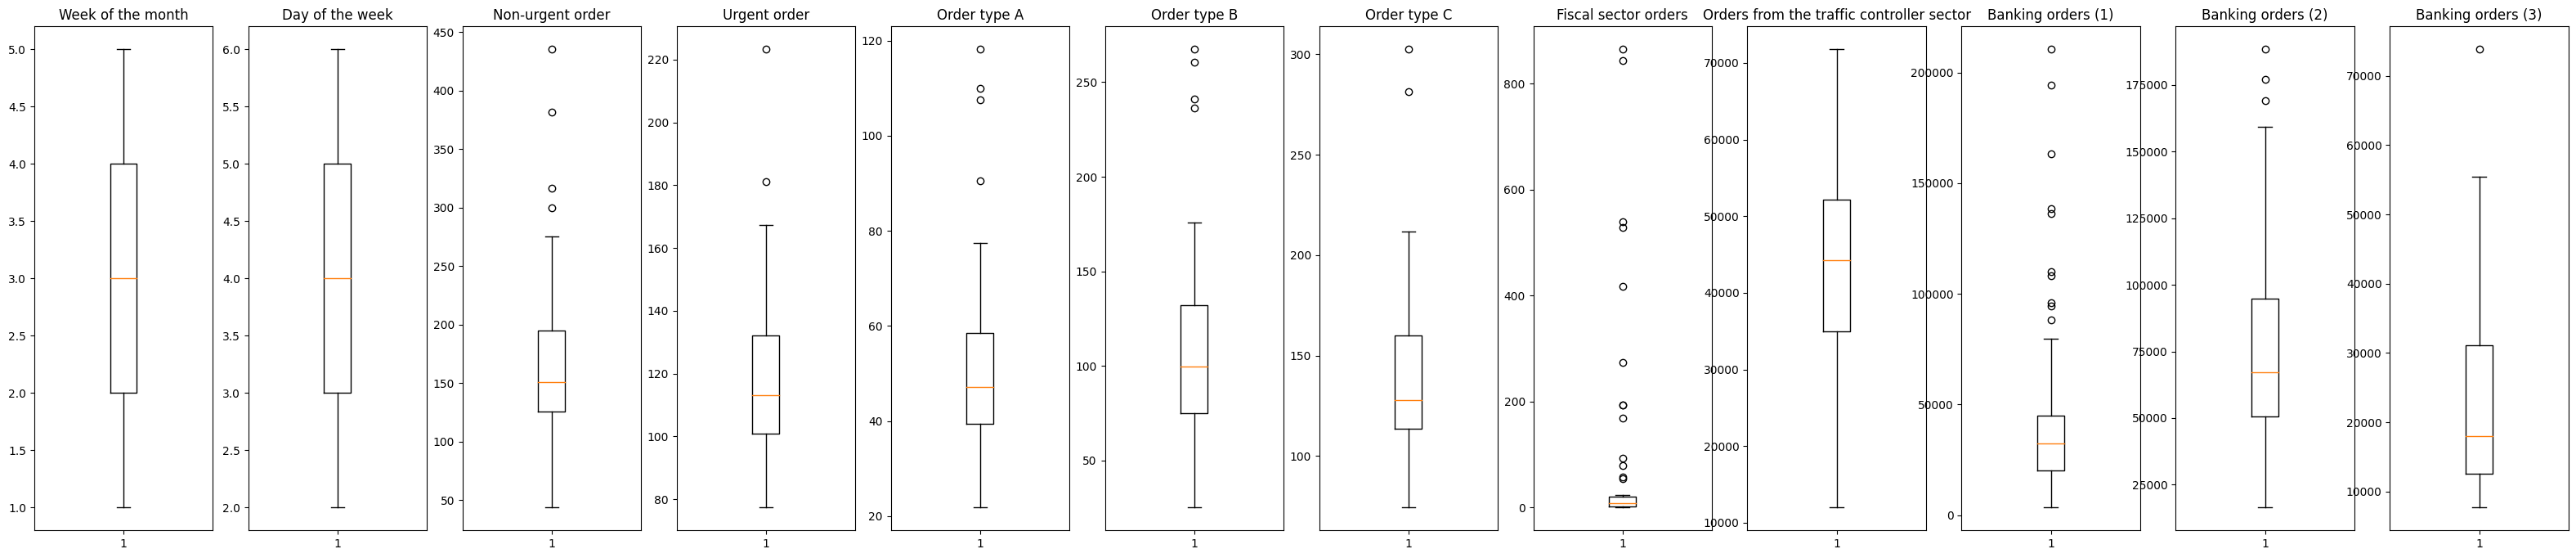

In [174]:
fig, axs = plt.subplots(1, num_cols, figsize=(40, 8))

for i, col in enumerate(X.columns):
    axs[i].boxplot(X[col])
    axs[i].set_title(col)

plt.show()

In [175]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [176]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

# Primer modelo: CNN con LSTM
model_cnn_lstm = keras.Sequential([
    Conv1D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=(X.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    Conv1D(filters=64, kernel_size=3, padding="same", activation="relu"),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    LSTM(units=128, return_sequences=True),
    LSTM(units=64),
    BatchNormalization(),
    Dropout(0.5),
    Flatten(),
    Dense(units=128, activation="relu"),
    Dense(units=64, activation="relu"),
    Dense(units=1, activation="linear"),
])

# Segundo modelo: MLP
model_mlp = keras.Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])
# Compilación de los modelos
model_cnn_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_mlp.compile(optimizer='adam', loss='mean_squared_error')


In [184]:
# Entrenamiento de los modelos
history_cnn_lstm = model_cnn_lstm.fit(X, y, epochs=80, validation_split=.1)

Epoch 1/80
2/2 [==============================] - 0s 165ms/step - loss: 1719.3242 - val_loss: 568.6862
Epoch 2/80
2/2 [==============================] - 0s 99ms/step - loss: 2756.8906 - val_loss: 521.9920
Epoch 3/80
2/2 [==============================] - 0s 98ms/step - loss: 1424.0944 - val_loss: 506.8971
Epoch 4/80
2/2 [==============================] - 0s 129ms/step - loss: 3337.6968 - val_loss: 546.4321
Epoch 5/80
2/2 [==============================] - 0s 85ms/step - loss: 2371.8606 - val_loss: 373.8666
Epoch 6/80
2/2 [==============================] - 0s 178ms/step - loss: 2265.9956 - val_loss: 252.8386
Epoch 7/80
2/2 [==============================] - 0s 65ms/step - loss: 1505.4552 - val_loss: 154.1962
Epoch 8/80
2/2 [==============================] - 0s 91ms/step - loss: 3360.5569 - val_loss: 51.8726
Epoch 9/80
2/2 [==============================] - 0s 149ms/step - loss: 2968.2002 - val_loss: 30.1916
Epoch 10/80
2/2 [==============================] - 0s 74ms/step - loss: 2757.974

In [185]:
evaluation_cnn_lstm = model_cnn_lstm.evaluate(X, y)


2/2 [==============================] - 0s 19ms/step - loss: 314.6500


In [186]:
history_mlp = model_mlp.fit(X, y, epochs=60, validation_split=.1)

Epoch 1/60
2/2 [==============================] - 0s 130ms/step - loss: 95940.8359 - val_loss: 84293.9375
Epoch 2/60
2/2 [==============================] - 0s 67ms/step - loss: 95616.2812 - val_loss: 83896.7109
Epoch 3/60
2/2 [==============================] - 0s 67ms/step - loss: 95020.1875 - val_loss: 83456.5078
Epoch 4/60
2/2 [==============================] - 0s 67ms/step - loss: 94450.0938 - val_loss: 82971.0078
Epoch 5/60
2/2 [==============================] - 0s 68ms/step - loss: 93730.2812 - val_loss: 82425.9609
Epoch 6/60
2/2 [==============================] - 0s 50ms/step - loss: 92889.7188 - val_loss: 81826.9688
Epoch 7/60
2/2 [==============================] - 0s 48ms/step - loss: 91939.8672 - val_loss: 81152.8438
Epoch 8/60
2/2 [==============================] - 0s 59ms/step - loss: 90872.9609 - val_loss: 80403.2969
Epoch 9/60
2/2 [==============================] - 0s 70ms/step - loss: 89999.7812 - val_loss: 79580.9453
Epoch 10/60
2/2 [==============================] - 0s 

In [187]:
evaluation_mlp = model_mlp.evaluate(X, y)

2/2 [==============================] - 0s 15ms/step - loss: 7046.4893


In [188]:

predictions_cnn_lstm = model_cnn_lstm.predict(X)
predictions_mlp = model_mlp.predict(X)

2/2 [==============================] - 0s 10ms/step


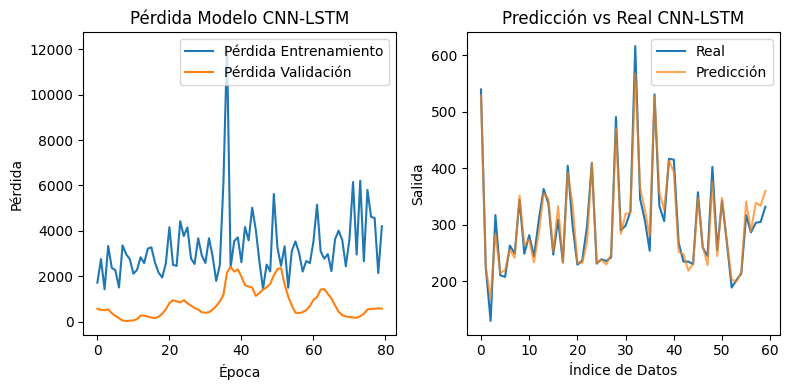

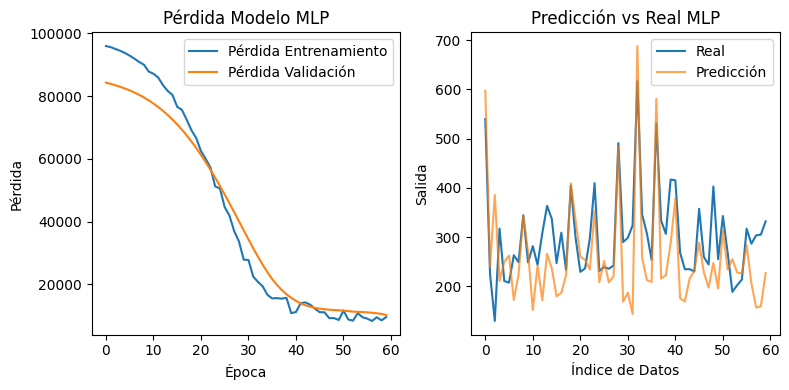

In [189]:
# Gráficas de entrenamiento y validación para CNN-LSTM
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cnn_lstm.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history_cnn_lstm.history['val_loss'], label='Pérdida Validación')
plt.title('Pérdida Modelo CNN-LSTM')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

# Gráficas de predicciones vs valores reales para CNN-LSTM
plt.subplot(1, 2, 2)
plt.plot(y, label='Real')
plt.plot(predictions_cnn_lstm.flatten(), label='Predicción', alpha=0.7)
plt.title('Predicción vs Real CNN-LSTM')
plt.xlabel('Índice de Datos')
plt.ylabel('Salida')
plt.legend()

plt.tight_layout()
plt.show()

# Gráficas de entrenamiento y validación para MLP
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history_mlp.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history_mlp.history['val_loss'], label='Pérdida Validación')
plt.title('Pérdida Modelo MLP')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

# Gráficas de predicciones vs valores reales para MLP
plt.subplot(1, 2, 2)
plt.plot(y, label='Real')
plt.plot(predictions_mlp, label='Predicción', alpha=0.7)
plt.title('Predicción vs Real MLP')
plt.xlabel('Índice de Datos')
plt.ylabel('Salida')
plt.legend()

plt.tight_layout()
plt.show()

## Parte 3 - Clasificación de Series de Tiempo

### Occupancy Detection

#### [Link del Dataset](https://archive.ics.uci.edu/dataset/357/occupancy+detection)

Experimental data used for binary classification (room occupancy) from Temperature, Humidity, Light and CO2. Ground-truth occupancy was obtained from time stamped pictures that were taken every minute.

Dataset Characteristics
Multivariate, Time-Series

Associated Tasks
Classification

Feature Type: Real

- Instances
20560

- Features
6

| Variable | Role | Type | Description | Units | Missing Values |
| --- | --- | --- | --- | --- | --- |
| id | ID | Integer |  |  | no |
| date | Feature | Date |  |  | no |
| Temperature | Feature | Integer |  |  | no |
| Humidity | Feature | Continuous |  | % | no |
| Light | Feature | Integer |  | Lux | no |

Variables information:

date time year-month-day hour:minute:second

Temperature, in Celsius

Relative Humidity, %

Light, in Lux

CO2, in ppm

Humidity Ratio, Derived quantity from temperature and relative humidity, in
kgwater-vapor/kg-air

Occupancy, 0 or 1, 0 for not occupied, 1 for occupied status



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Librerias

In [10]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

##### Datos

In [92]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
occupancy_detection = fetch_ucirepo(id=357)

# data (as pandas dataframes)
X = occupancy_detection.data.features
y = occupancy_detection.data.targets


In [3]:
#loading the datasets
df1 = pd.read_csv('/content/drive/MyDrive/series_no_lineales/proyecto_final/occupancy+detection.zip (Unzipped Files)/datatest.txt')
df2 = pd.read_csv('/content/drive/MyDrive/series_no_lineales/proyecto_final/occupancy+detection.zip (Unzipped Files)/datatraining.txt')

#combining the datasets
df = pd.concat([df1, df2])
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


#### Data Preprocessing

In [4]:
#number of rows and columns
df.shape

(10808, 7)

In [5]:
#checking for null values
df.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [6]:
#removing the duplicate values
df.drop_duplicates(inplace=True)

In [7]:
#checking data types
df.dtypes

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

In [8]:
#converting the date and time to datetime format
df['date'] = pd.to_datetime(df['date'])

In [9]:
df.dtypes

date             datetime64[ns]
Temperature             float64
Humidity                float64
Light                   float64
CO2                     float64
HumidityRatio           float64
Occupancy                 int64
dtype: object

In [100]:
#checking the descriptive statistics
df.describe()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,10808,10808.000000,10808.000000,10808.000000,10808.00000,10808.000000,10808.000000
mean,2015-02-06 13:44:12.396003072,20.819992,25.638407,137.694088,634.00507,0.003903,0.249907
min,2015-02-02 14:19:00,19.000000,16.745000,0.000000,412.75000,0.002674,0.000000
25%,2015-02-04 18:27:45,20.000000,21.390000,0.000000,441.00000,0.003323,0.000000
50%,2015-02-06 15:29:29.500000,20.700000,25.680000,0.000000,464.00000,0.003805,0.000000
75%,2015-02-08 12:31:14.249999872,21.500000,28.324167,413.541667,761.00000,0.004372,0.000000
max,2015-02-10 09:33:00,24.408333,39.117500,1697.250000,2028.50000,0.006476,1.000000
std,NaN,1.078410,4.953792,212.175483,312.81727,0.000803,0.432979


In [101]:
#value counts for the target variable i.e. occupancy
df['Occupancy'].value_counts()

Occupancy
0    8107
1    2701
Name: count, dtype: int64

#### EDA

#####  Lineplot for Themperature Changes for Time

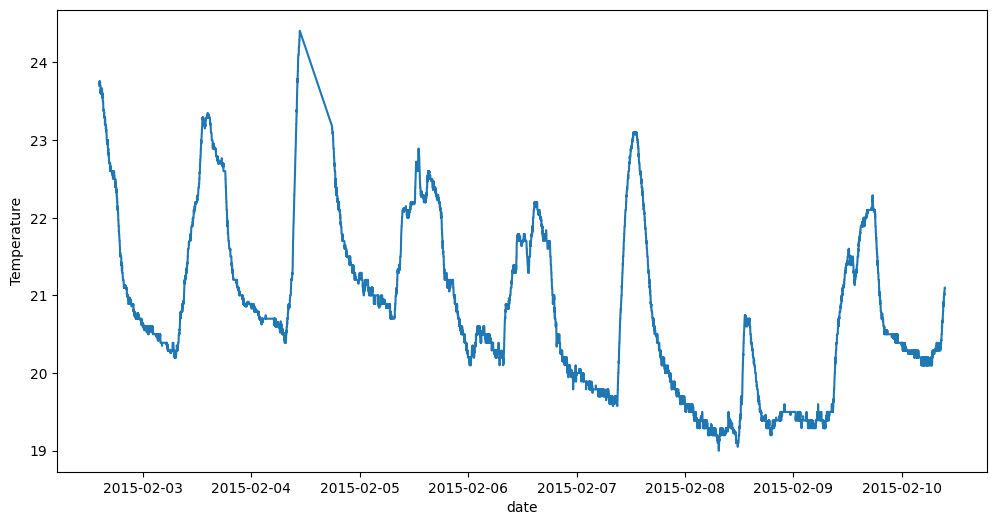

In [102]:
plt.figure(figsize = (12, 6))
sns.lineplot(x = 'date', y = 'Temperature', data = df)
plt.show()

##### Lineplot for Humidity Changes for Time

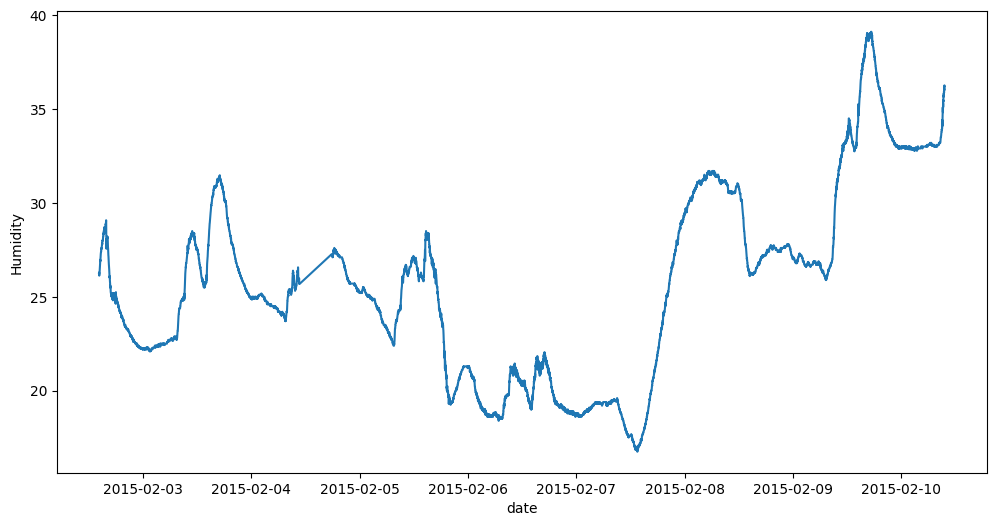

In [103]:
plt.figure(figsize = (12, 6))
sns.lineplot(x = 'date', y = 'Humidity', data = df)
plt.show()

##### Visualizing the light fluctuations over time

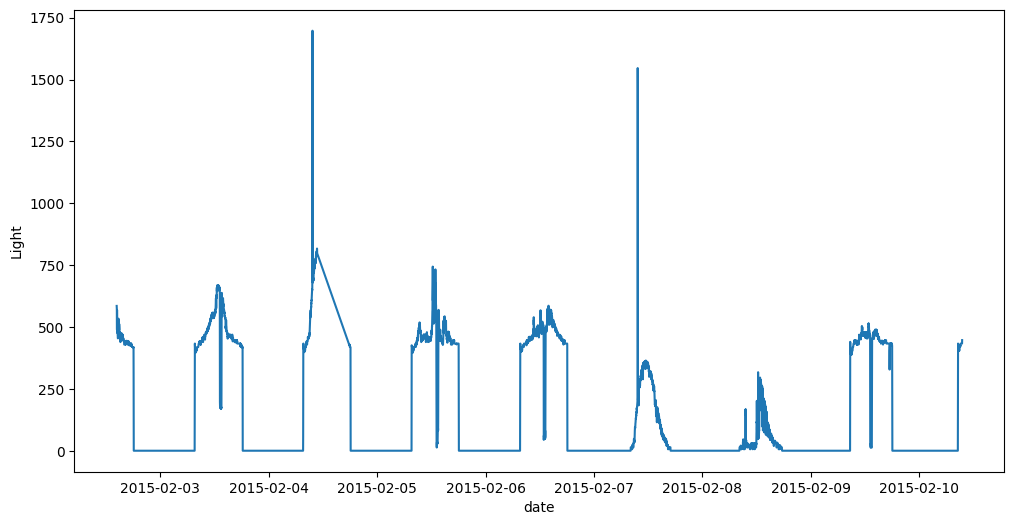

In [104]:
plt.figure(figsize = (12, 6))
sns.lineplot(x = 'date', y = 'Light', data = df)
plt.show()

##### Visualizing the CO2 fluctuations over time

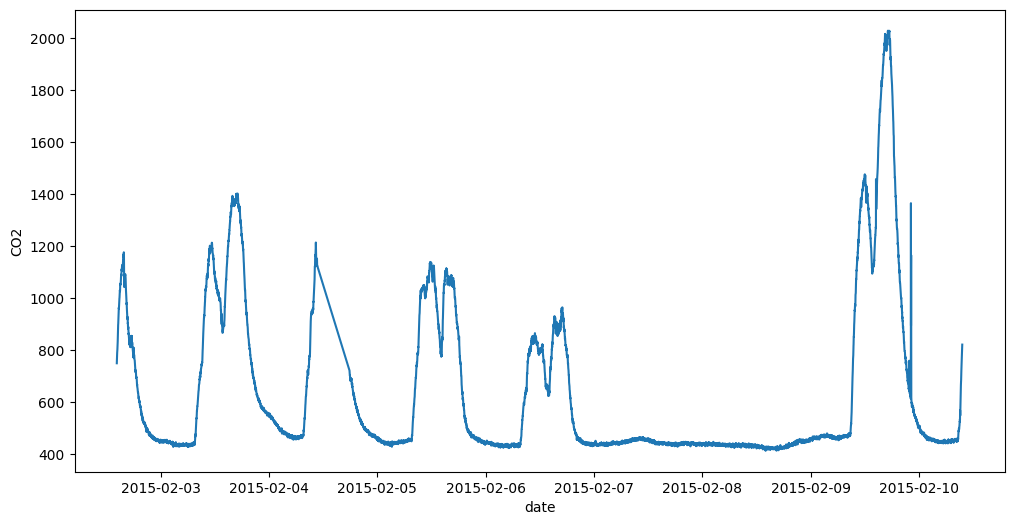

In [105]:
plt.figure(figsize = (12, 6))
sns.lineplot(x = 'date',y = 'CO2', data = df)
plt.show()

##### Visualizing the humidity ratio fluctuations over time

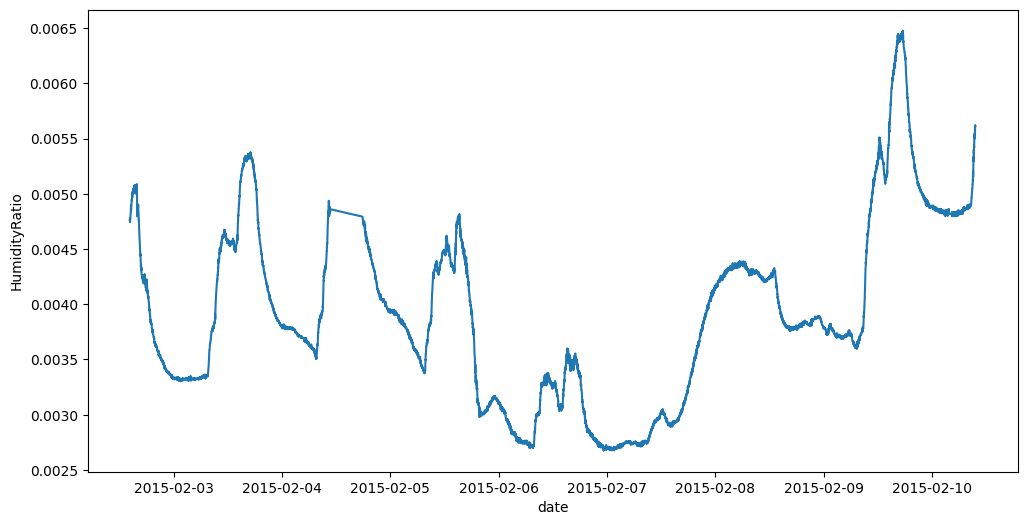

In [106]:
plt.figure(figsize = (12, 6))
sns.lineplot(x = 'date', y = 'HumidityRatio', data = df)
plt.show()

#### Correlation Between the Variables

##### Correlation Heatmap

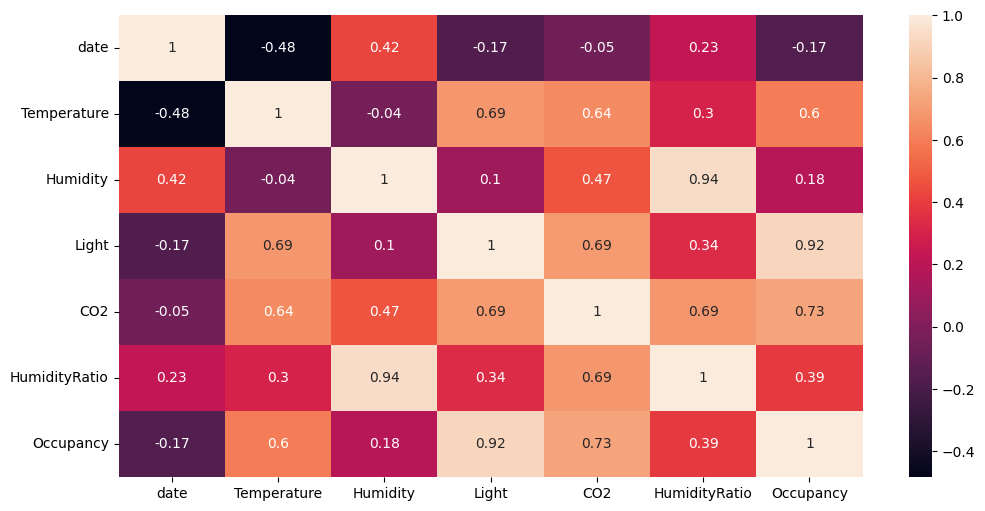

In [107]:
plt.figure(figsize = (12, 6))
sns.heatmap(df.corr(), annot = True)
plt.show()

##### Temperature and Occupancy

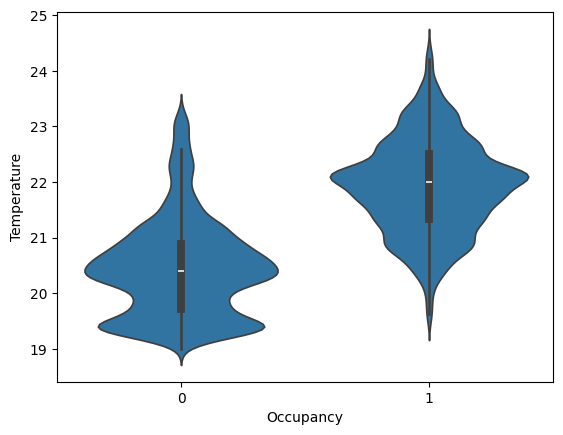

In [108]:
sns.violinplot(y = df['Temperature'], x = df['Occupancy'])
plt.xlabel('Occupancy')
plt.ylabel('Temperature')
plt.show()

##### Light and Occupancy

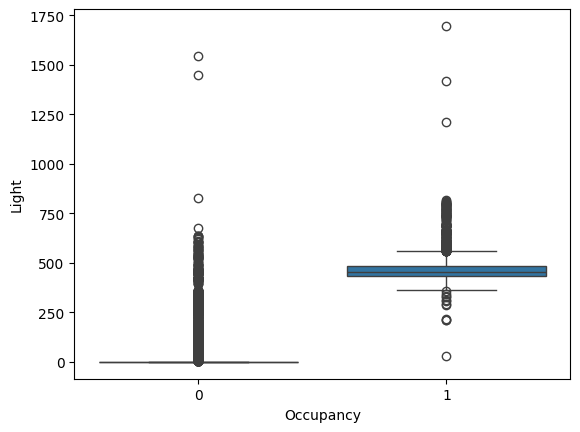

In [109]:
sns.boxplot(y = df['Light'], x = df['Occupancy'])
plt.xlabel('Occupancy')
plt.ylabel('Light')
plt.show()

##### CO2 and Occupancy

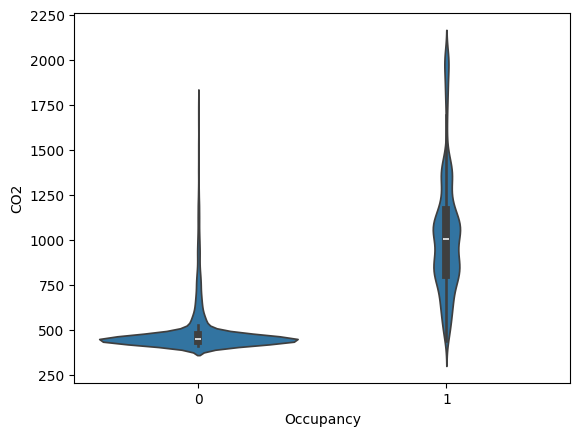

In [110]:
sns.violinplot(y = df['CO2'], x = df['Occupancy'])
plt.xlabel('Occupancy')
plt.ylabel('CO2')
plt.show()

#### Data Preprocessing 2

In [13]:
df.drop(['Temperature', 'date',], axis = 1, inplace = True)

In [14]:
df.head(10)

,Humidity,Light,CO2,HumidityRatio,Occupancy
140,26.272,585.200000,749.200000,0.004764,1
141,26.290,578.400000,760.400000,0.004773,1
142,26.230,572.666667,769.666667,0.004765,1
143,26.125,493.750000,774.750000,0.004744,1
144,26.200,488.600000,779.000000,0.004767,1
145,26.260,568.666667,790.000000,0.004779,1
146,26.290,536.333333,798.000000,0.004776,1
147,26.290,509.000000,797.000000,0.004783,1
148,26.350,476.000000,803.200000,0.004794,1
149,26.390,510.000000,809.000000,0.004796,1


#### Train, Test Split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['Occupancy'], axis = 1), df['Occupancy'], test_size = 0.2, random_state = 42)

In [16]:
print("Class distribution before balancing:")
print(Counter(y_train))

Class distribution before balancing:
Counter({0: 6490, 1: 2156})


In [17]:
smote = SMOTE(random_state=42)

# random undersampler
undersampler = RandomUnderSampler(random_state=42)

# SMOTE to the minority classes
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# Apply random undersampling to the majority classes
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_resampled, y_resampled)
print("Class distribution after balancing:")
print(Counter(y_train_balanced))


Class distribution after balancing:
Counter({0: 6490, 1: 6490})


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.fit_transform(x_test)

#### Model Building

##### Random Tree Classifier

In [118]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc

RandomForestClassifier()

In [119]:
#training the model
rfc.fit(x_train, y_train)

#training accuracy
rfc.score(x_train, y_train)

1.0

#### Model Evaluation

In [120]:
rfc_pred = rfc.predict(x_test)

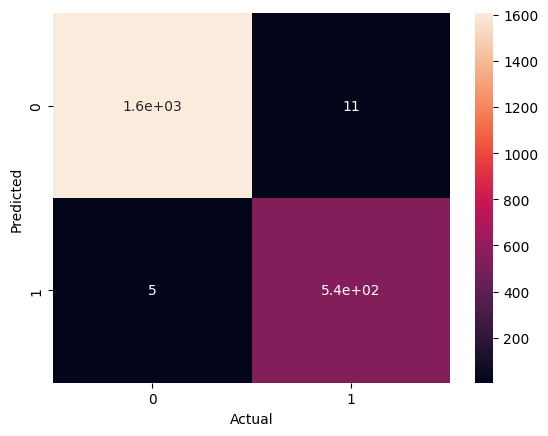

In [121]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, rfc_pred), annot = True)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

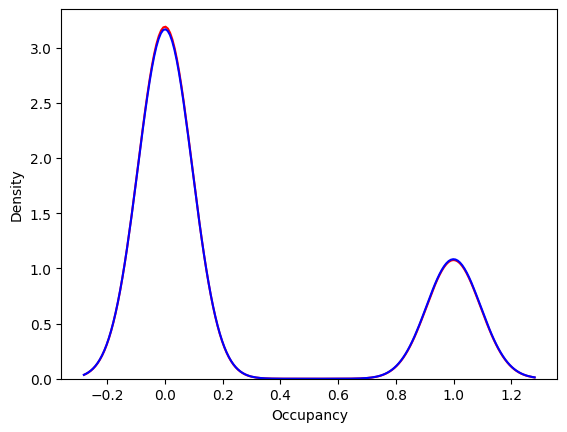

In [122]:
ax = sns.distplot(y_test, hist = False, label = 'Actual', color = 'r')
sns.distplot(rfc_pred, hist = False, label = 'Predicted', color = 'b', ax = ax)
plt.show()

In [123]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1617
           1       0.98      0.99      0.99       545

    accuracy                           0.99      2162
   macro avg       0.99      0.99      0.99      2162
weighted avg       0.99      0.99      0.99      2162



In [125]:
print('Accuracy Score : ' + str(accuracy_score(y_test,rfc_pred)))
print('Precision Score : ' + str(precision_score(y_test,rfc_pred)))
print('Recall Score : ' + str(recall_score(y_test,rfc_pred)))
print('F1 Score : ' + str(f1_score(y_test,rfc_pred)))

Accuracy Score : 0.9925994449583718
Precision Score : 0.9800362976406534
Recall Score : 0.9908256880733946
F1 Score : 0.9854014598540147


#### Testing the Model on New Dataset

In [136]:
df_new = pd.read_csv('/content/drive/MyDrive/series_no_lineales/proyecto_final/occupancy+detection.zip (Unzipped Files)/datatest2.txt')
df_new.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [139]:
df_new.drop(['Temperature', 'date'], axis = 1, inplace = True)

In [140]:
x = df_new.drop(['Occupancy'], axis = 1)
y = df_new['Occupancy']

In [141]:
pred = rfc.predict(x)

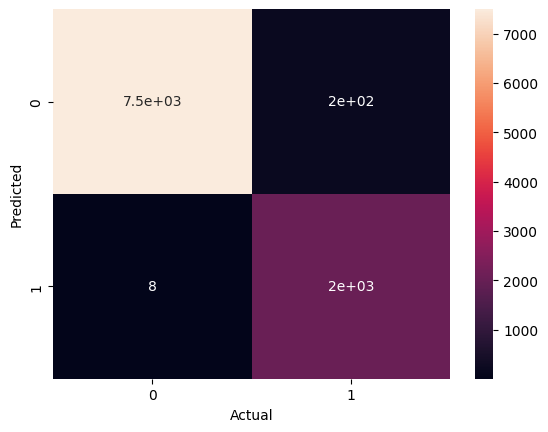

In [142]:
sns.heatmap(confusion_matrix(y, pred),annot = True)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

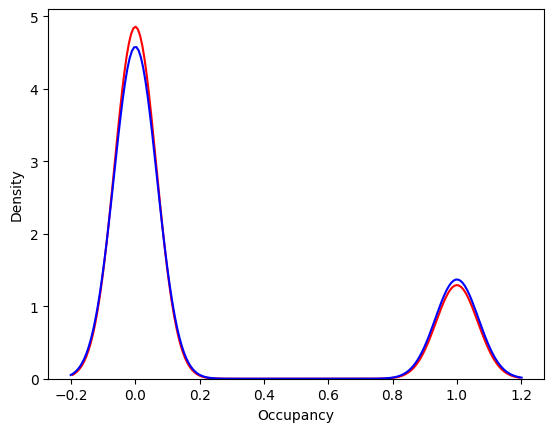

In [143]:
ax = sns.distplot(y,hist=False,label='Actual', color='r')
sns.distplot(pred,hist=False,label='Predicted',color='b',ax=ax)
plt.show()

In [144]:
print(classification_report(y,pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      7703
           1       0.91      1.00      0.95      2049

    accuracy                           0.98      9752
   macro avg       0.95      0.98      0.97      9752
weighted avg       0.98      0.98      0.98      9752



In [145]:
print('Accuracy Score : ' + str(accuracy_score(y,pred)))
print('Precision Score : ' + str(precision_score(y,pred)))
print('Recall Score : ' + str(recall_score(y,pred)))
print('F1 Score : ' + str(f1_score(y,pred)))

Accuracy Score : 0.9782608695652174
Precision Score : 0.9091314031180401
Recall Score : 0.9960956564177648
F1 Score : 0.9506287843502562


In [146]:
model2 = LogisticRegression(random_state=42)
model2.fit(X_train_balanced_scaled, y_train_balanced)

model3 = XGBClassifier(n_jobs = 24)
model3.fit(X_train_balanced_scaled, y_train_balanced)

model4 = DecisionTreeClassifier(random_state=42)
model4.fit(X_train_balanced_scaled, y_train_balanced)

model5 = KNeighborsClassifier()
model5.fit(X_train_balanced_scaled, y_train_balanced)

model6 = GaussianNB()
model6.fit(X_train_balanced_scaled, y_train_balanced)

GaussianNB()

In [147]:
models = [model2, model3, model4, model5, model6]
for model in models:
  y_pred = model.predict(X_test_scaled)
  f1 = f1_score(y_test, y_pred, average='macro')
  print(f"Model: {model.__class__.__name__}, F1 Score: {f1}")

Model: LogisticRegression, F1 Score: 0.9475514296804244
Model: XGBClassifier, F1 Score: 0.9277755860418947
Model: DecisionTreeClassifier, F1 Score: 0.7666782028810766
Model: KNeighborsClassifier, F1 Score: 0.9557961799066853
Model: GaussianNB, F1 Score: 0.9316846497709129


In [19]:
import tensorflow as tf
trainy = tf.keras.utils.to_categorical(y_train_balanced,num_classes = 2)
testy = tf.keras.utils.to_categorical(y_test ,num_classes = 2)

In [20]:
trainy

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [21]:
X_train_balanced_scaled.shape

(12980, 4)

In [22]:
trainX = np.expand_dims(X_train_balanced_scaled, axis=-1)
testX = np.expand_dims(X_test_scaled, axis=-1)
trainy = np.array(trainy)
testy = np.array(testy)

In [23]:
n_outputs = len(np.unique(trainy))
n_outputs

2

In [24]:
n_timesteps, n_features = trainX.shape[1], trainX.shape[2]

In [25]:
# Importar librerías
from keras.layers import MaxPooling1D
from keras.layers import Conv1D
from keras.layers import TimeDistributed
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import ConvLSTM2D
from keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
from keras.layers import Dense, BatchNormalization, Input

In [155]:
def cnnlstm(X_train, y_train, X_test, y_test, n_timesteps, n_features):

    model = Sequential([
        LSTM(128, activation='tanh', input_shape=(n_timesteps, n_features)),
        Dense(60, activation='relu'),
        Dropout(0.2),
        Dense(30, activation='relu'),

        Dense(n_outputs, activation='sigmoid')
    ])
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
    early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=0)

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


    # Ajustar el modelo
    history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=200,
    callbacks=[early_stop],
    verbose=1
    )

    # Evaluar el modelo
    _, accuracy = model.evaluate(testX, testy, verbose=True)
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int)
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f"LSTM F1 Score: {f1}")
    print('Accuracy: %.2f' % (accuracy*100))

    return model

In [26]:
trainX.shape, trainy.shape, testX.shape, testy.shape

((12980, 4, 1), (12980, 2), (2162, 4, 1), (2162, 2))

In [157]:
n_timesteps, n_features = trainX.shape[1], trainX.shape[2]
train_lstm_model = cnnlstm(trainX, trainy, testX, testy, n_timesteps, n_features)

Epoch 1/100
52/52 [==============================] - 7s 16ms/step - loss: 0.4614 - accuracy: 0.8215 - val_loss: 0.3838 - val_accuracy: 0.7681
Epoch 2/100
52/52 [==============================] - 0s 8ms/step - loss: 0.1241 - accuracy: 0.9577 - val_loss: 0.0390 - val_accuracy: 0.9946
Epoch 3/100
52/52 [==============================] - 0s 8ms/step - loss: 0.0645 - accuracy: 0.9831 - val_loss: 0.0368 - val_accuracy: 0.9981
Epoch 4/100
52/52 [==============================] - 0s 7ms/step - loss: 0.0555 - accuracy: 0.9859 - val_loss: 0.0395 - val_accuracy: 0.9981
Epoch 5/100
52/52 [==============================] - 0s 8ms/step - loss: 0.0539 - accuracy: 0.9859 - val_loss: 0.0278 - val_accuracy: 0.9985
Epoch 6/100
52/52 [==============================] - 0s 7ms/step - loss: 0.0532 - accuracy: 0.9864 - val_loss: 0.0292 - val_accuracy: 0.9985
Epoch 7/100
52/52 [==============================] - 0s 7ms/step - loss: 0.0508 - accuracy: 0.9863 - val_loss: 0.0418 - val_accuracy: 0.9981
Epoch 8/100


68/68 [==============================] - 1s 3ms/step
LSTM F1 Score: 0.944172537950944
Accuracy: 95.61


#### Optimization with OPTUNA

In [32]:
import optuna

def cnnlstm_trial(X_train, y_train, X_test, y_test, n_timesteps, n_features, trial):

    n_lstm_units = trial.suggest_int('n_lstm_units', 64, 256)
    dense_units = trial.suggest_int('dense_units', 30, 100)
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
    batch_size = trial.suggest_int('batch_size', 100, 200)
    epochs = trial.suggest_int('epochs', 50, 200)


    model = Sequential([
        LSTM(n_lstm_units, activation='tanh', input_shape=(n_timesteps, n_features)),
        Dense(dense_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(dense_units, activation='relu'),
        Dense(n_outputs, activation='sigmoid')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=0)
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stop],
        verbose=0
    )

    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int)
    f1 = f1_score(y_test, y_pred, average='macro')

    return f1

# optimization
study = optuna.create_study(direction='maximize')
study.optimize(lambda trial: cnnlstm_trial(trainX, trainy, testX, testy, n_timesteps, n_features, trial), n_trials=50)

best_trial = study.best_trial
print('Best F1 Score:', best_trial.value)
print('Best Hyperparameters:')
print('  n_lstm_units:', best_trial.params['n_lstm_units'])
print('  dense_units:', best_trial.params['dense_units'])
print('  dropout_rate:', best_trial.params['dropout_rate'])
print('  learning_rate:', best_trial.params['learning_rate'])
print('  batch_size:', best_trial.params['batch_size'])
print('  epochs:', best_trial.params['epochs'])

best_model = cnnlstm_trial(trainX, trainy, testX, testy, n_timesteps, n_features, best_trial)

[I 2024-05-09 23:28:15,665] A new study created in memory with name: no-name-0a4e3e23-b8f7-4ca9-8bf5-60dd1281b5b6
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 1s 4ms/step


[I 2024-05-09 23:28:48,685] Trial 0 finished with value: 0.951613016647842 and parameters: {'n_lstm_units': 250, 'dense_units': 75, 'dropout_rate': 0.36174310859288794, 'learning_rate': 0.00024266357568255266, 'batch_size': 193, 'epochs': 148}. Best is trial 0 with value: 0.951613016647842.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 0s 2ms/step


[I 2024-05-09 23:29:00,502] Trial 1 finished with value: 0.953690626444643 and parameters: {'n_lstm_units': 127, 'dense_units': 77, 'dropout_rate': 0.10950129106544787, 'learning_rate': 0.001001941268282105, 'batch_size': 125, 'epochs': 171}. Best is trial 1 with value: 0.953690626444643.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 1s 3ms/step


[I 2024-05-09 23:29:14,899] Trial 2 finished with value: 0.9475514296804244 and parameters: {'n_lstm_units': 146, 'dense_units': 68, 'dropout_rate': 0.3727264523281595, 'learning_rate': 0.011590540930354505, 'batch_size': 150, 'epochs': 83}. Best is trial 1 with value: 0.953690626444643.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 0s 3ms/step


[I 2024-05-09 23:29:20,980] Trial 3 finished with value: 0.9650341618524838 and parameters: {'n_lstm_units': 82, 'dense_units': 65, 'dropout_rate': 0.25026450139234013, 'learning_rate': 0.016893249479354725, 'batch_size': 199, 'epochs': 178}. Best is trial 3 with value: 0.9650341618524838.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 1s 3ms/step


[I 2024-05-09 23:29:31,982] Trial 4 finished with value: 0.9604679742122401 and parameters: {'n_lstm_units': 152, 'dense_units': 68, 'dropout_rate': 0.3632698400803235, 'learning_rate': 0.011440850660069736, 'batch_size': 169, 'epochs': 127}. Best is trial 3 with value: 0.9650341618524838.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 0s 3ms/step


[I 2024-05-09 23:29:50,855] Trial 5 finished with value: 0.9540897792154224 and parameters: {'n_lstm_units': 95, 'dense_units': 100, 'dropout_rate': 0.4999050174134021, 'learning_rate': 0.00023697308982479883, 'batch_size': 113, 'epochs': 87}. Best is trial 3 with value: 0.9650341618524838.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 1s 4ms/step


[I 2024-05-09 23:30:03,784] Trial 6 finished with value: 0.9467699332222523 and parameters: {'n_lstm_units': 247, 'dense_units': 95, 'dropout_rate': 0.19176226799977233, 'learning_rate': 0.007677195084806117, 'batch_size': 165, 'epochs': 53}. Best is trial 3 with value: 0.9650341618524838.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 0s 3ms/step


[I 2024-05-09 23:30:10,990] Trial 7 finished with value: 0.7901714618256142 and parameters: {'n_lstm_units': 101, 'dense_units': 61, 'dropout_rate': 0.2915076606920968, 'learning_rate': 0.06239804347363958, 'batch_size': 169, 'epochs': 198}. Best is trial 3 with value: 0.9650341618524838.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 1s 3ms/step


[I 2024-05-09 23:30:26,703] Trial 8 finished with value: 0.427890976448796 and parameters: {'n_lstm_units': 163, 'dense_units': 100, 'dropout_rate': 0.33485792207743836, 'learning_rate': 0.07160933549151424, 'batch_size': 106, 'epochs': 182}. Best is trial 3 with value: 0.9650341618524838.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 0s 2ms/step


[I 2024-05-09 23:30:42,051] Trial 9 finished with value: 0.9546520114296513 and parameters: {'n_lstm_units': 71, 'dense_units': 50, 'dropout_rate': 0.2604027884692013, 'learning_rate': 0.00021763826805423398, 'batch_size': 127, 'epochs': 119}. Best is trial 3 with value: 0.9650341618524838.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 1s 3ms/step


[I 2024-05-09 23:30:59,162] Trial 10 finished with value: 0.9754541529977019 and parameters: {'n_lstm_units': 188, 'dense_units': 31, 'dropout_rate': 0.20052538482366689, 'learning_rate': 0.0024404950425775743, 'batch_size': 197, 'epochs': 156}. Best is trial 10 with value: 0.9754541529977019.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 1s 3ms/step


[I 2024-05-09 23:31:07,332] Trial 11 finished with value: 0.954814303927101 and parameters: {'n_lstm_units': 193, 'dense_units': 32, 'dropout_rate': 0.2108132392594614, 'learning_rate': 0.001968395682717566, 'batch_size': 200, 'epochs': 162}. Best is trial 10 with value: 0.9754541529977019.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 1s 4ms/step


[I 2024-05-09 23:31:21,639] Trial 12 finished with value: 0.9598999298461525 and parameters: {'n_lstm_units': 202, 'dense_units': 33, 'dropout_rate': 0.12229785985717989, 'learning_rate': 0.0033430318200736203, 'batch_size': 186, 'epochs': 142}. Best is trial 10 with value: 0.9754541529977019.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 1s 4ms/step


[I 2024-05-09 23:31:32,183] Trial 13 finished with value: 0.9559403135941047 and parameters: {'n_lstm_units': 197, 'dense_units': 45, 'dropout_rate': 0.19903750778765422, 'learning_rate': 0.01790317771672401, 'batch_size': 182, 'epochs': 195}. Best is trial 10 with value: 0.9754541529977019.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 0s 2ms/step


[I 2024-05-09 23:31:42,412] Trial 14 finished with value: 0.9550525340933549 and parameters: {'n_lstm_units': 64, 'dense_units': 49, 'dropout_rate': 0.24956829558434043, 'learning_rate': 0.0007667112274677464, 'batch_size': 148, 'epochs': 162}. Best is trial 10 with value: 0.9754541529977019.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 1s 4ms/step


[I 2024-05-09 23:31:55,380] Trial 15 finished with value: 0.9684846844631689 and parameters: {'n_lstm_units': 225, 'dense_units': 84, 'dropout_rate': 0.15542598496421775, 'learning_rate': 0.03444321205919155, 'batch_size': 200, 'epochs': 119}. Best is trial 10 with value: 0.9754541529977019.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 1s 4ms/step


[I 2024-05-09 23:32:11,827] Trial 16 finished with value: 0.9520094506332184 and parameters: {'n_lstm_units': 222, 'dense_units': 88, 'dropout_rate': 0.14800565241040775, 'learning_rate': 0.004305990326639263, 'batch_size': 181, 'epochs': 104}. Best is trial 10 with value: 0.9754541529977019.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 1s 4ms/step


[I 2024-05-09 23:32:22,284] Trial 17 finished with value: 0.9475514296804244 and parameters: {'n_lstm_units': 174, 'dense_units': 84, 'dropout_rate': 0.16011188146649918, 'learning_rate': 0.034297957883109964, 'batch_size': 164, 'epochs': 137}. Best is trial 10 with value: 0.9754541529977019.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 1s 4ms/step


[I 2024-05-09 23:32:39,771] Trial 18 finished with value: 0.9553770163064319 and parameters: {'n_lstm_units': 221, 'dense_units': 57, 'dropout_rate': 0.4378727104393813, 'learning_rate': 0.001264802868731731, 'batch_size': 150, 'epochs': 102}. Best is trial 10 with value: 0.9754541529977019.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 1s 4ms/step


[I 2024-05-09 23:32:53,868] Trial 19 finished with value: 0.9529670562020705 and parameters: {'n_lstm_units': 226, 'dense_units': 39, 'dropout_rate': 0.15572599284066313, 'learning_rate': 0.0004694156552079221, 'batch_size': 188, 'epochs': 120}. Best is trial 10 with value: 0.9754541529977019.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 1s 3ms/step


[I 2024-05-09 23:33:38,028] Trial 20 finished with value: 0.9518466427581904 and parameters: {'n_lstm_units': 184, 'dense_units': 83, 'dropout_rate': 0.21903053141177042, 'learning_rate': 0.00010748483233842826, 'batch_size': 176, 'epochs': 73}. Best is trial 10 with value: 0.9754541529977019.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 0s 3ms/step


[I 2024-05-09 23:33:45,541] Trial 21 finished with value: 0.9576337336333678 and parameters: {'n_lstm_units': 129, 'dense_units': 56, 'dropout_rate': 0.2712438534381167, 'learning_rate': 0.026665980973347755, 'batch_size': 198, 'epochs': 179}. Best is trial 10 with value: 0.9754541529977019.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 1s 4ms/step


[I 2024-05-09 23:33:55,123] Trial 22 finished with value: 0.9597385588815492 and parameters: {'n_lstm_units': 212, 'dense_units': 74, 'dropout_rate': 0.2357773561715446, 'learning_rate': 0.00580828029464088, 'batch_size': 200, 'epochs': 155}. Best is trial 10 with value: 0.9754541529977019.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 1s 4ms/step


[I 2024-05-09 23:34:18,341] Trial 23 finished with value: 0.9720052497944107 and parameters: {'n_lstm_units': 233, 'dense_units': 92, 'dropout_rate': 0.31231182747196323, 'learning_rate': 0.03926306806759612, 'batch_size': 190, 'epochs': 134}. Best is trial 10 with value: 0.9754541529977019.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 1s 4ms/step


[I 2024-05-09 23:34:41,565] Trial 24 finished with value: 0.9553770163064319 and parameters: {'n_lstm_units': 239, 'dense_units': 89, 'dropout_rate': 0.316710377840329, 'learning_rate': 0.04329146933140623, 'batch_size': 189, 'epochs': 110}. Best is trial 10 with value: 0.9754541529977019.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 1s 4ms/step


[I 2024-05-09 23:34:53,512] Trial 25 finished with value: 0.427890976448796 and parameters: {'n_lstm_units': 234, 'dense_units': 93, 'dropout_rate': 0.18210463555079265, 'learning_rate': 0.09089526641132521, 'batch_size': 174, 'epochs': 135}. Best is trial 10 with value: 0.9754541529977019.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 1s 4ms/step


[I 2024-05-09 23:35:17,518] Trial 26 finished with value: 0.9610366205305652 and parameters: {'n_lstm_units': 254, 'dense_units': 84, 'dropout_rate': 0.4167663607379205, 'learning_rate': 0.002207703131592855, 'batch_size': 192, 'epochs': 129}. Best is trial 10 with value: 0.9754541529977019.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 1s 4ms/step


[I 2024-05-09 23:35:40,816] Trial 27 finished with value: 0.954814303927101 and parameters: {'n_lstm_units': 214, 'dense_units': 80, 'dropout_rate': 0.2922756872201094, 'learning_rate': 0.023777693786163834, 'batch_size': 157, 'epochs': 152}. Best is trial 10 with value: 0.9754541529977019.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 1s 4ms/step


[I 2024-05-09 23:35:54,077] Trial 28 finished with value: 0.9531296576318771 and parameters: {'n_lstm_units': 180, 'dense_units': 93, 'dropout_rate': 0.132014322533647, 'learning_rate': 0.047039084639417826, 'batch_size': 179, 'epochs': 111}. Best is trial 10 with value: 0.9754541529977019.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 1s 4ms/step


[I 2024-05-09 23:36:03,704] Trial 29 finished with value: 0.9387418847137518 and parameters: {'n_lstm_units': 238, 'dense_units': 73, 'dropout_rate': 0.10126951307702982, 'learning_rate': 0.006970381909929025, 'batch_size': 191, 'epochs': 144}. Best is trial 10 with value: 0.9754541529977019.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 1s 4ms/step


[I 2024-05-09 23:36:26,889] Trial 30 finished with value: 0.9551385806741419 and parameters: {'n_lstm_units': 207, 'dense_units': 38, 'dropout_rate': 0.3362892952601587, 'learning_rate': 0.0015415581865825501, 'batch_size': 193, 'epochs': 95}. Best is trial 10 with value: 0.9754541529977019.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 0s 2ms/step


[I 2024-05-09 23:36:34,515] Trial 31 finished with value: 0.8722718468908779 and parameters: {'n_lstm_units': 88, 'dense_units': 62, 'dropout_rate': 0.23251103002027723, 'learning_rate': 0.01218096576014608, 'batch_size': 197, 'epochs': 170}. Best is trial 10 with value: 0.9754541529977019.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 0s 3ms/step


[I 2024-05-09 23:36:41,894] Trial 32 finished with value: 0.9279205192034139 and parameters: {'n_lstm_units': 118, 'dense_units': 79, 'dropout_rate': 0.1690752711730441, 'learning_rate': 0.018606344712287465, 'batch_size': 185, 'epochs': 186}. Best is trial 10 with value: 0.9754541529977019.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 1s 3ms/step


[I 2024-05-09 23:36:54,774] Trial 33 finished with value: 0.9565041976597504 and parameters: {'n_lstm_units': 144, 'dense_units': 68, 'dropout_rate': 0.28065501399741755, 'learning_rate': 0.03148887410308918, 'batch_size': 195, 'epochs': 171}. Best is trial 10 with value: 0.9754541529977019.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 1s 3ms/step


[I 2024-05-09 23:37:03,219] Trial 34 finished with value: 0.954814303927101 and parameters: {'n_lstm_units': 164, 'dense_units': 87, 'dropout_rate': 0.3846851218899525, 'learning_rate': 0.012264791093840285, 'batch_size': 200, 'epochs': 160}. Best is trial 10 with value: 0.9754541529977019.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 1s 4ms/step


[I 2024-05-09 23:37:17,102] Trial 35 finished with value: 0.951450208772814 and parameters: {'n_lstm_units': 189, 'dense_units': 73, 'dropout_rate': 0.3129851814472584, 'learning_rate': 0.09596473285152742, 'batch_size': 192, 'epochs': 147}. Best is trial 10 with value: 0.9754541529977019.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 1s 4ms/step


[I 2024-05-09 23:37:27,548] Trial 36 finished with value: 0.9436800596409031 and parameters: {'n_lstm_units': 230, 'dense_units': 94, 'dropout_rate': 0.25041279040152487, 'learning_rate': 0.016923309285704253, 'batch_size': 136, 'epochs': 132}. Best is trial 10 with value: 0.9754541529977019.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 1s 4ms/step


[I 2024-05-09 23:37:38,264] Trial 37 finished with value: 0.9566660796150681 and parameters: {'n_lstm_units': 245, 'dense_units': 96, 'dropout_rate': 0.21664600032905507, 'learning_rate': 0.008538028874711457, 'batch_size': 185, 'epochs': 122}. Best is trial 10 with value: 0.9754541529977019.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 0s 3ms/step


[I 2024-05-09 23:37:51,104] Trial 38 finished with value: 0.9508915388983532 and parameters: {'n_lstm_units': 139, 'dense_units': 77, 'dropout_rate': 0.1894902372051514, 'learning_rate': 0.003539222372022399, 'batch_size': 173, 'epochs': 171}. Best is trial 10 with value: 0.9754541529977019.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 0s 3ms/step


[I 2024-05-09 23:37:58,610] Trial 39 finished with value: 0.96560769359043 and parameters: {'n_lstm_units': 109, 'dense_units': 70, 'dropout_rate': 0.14280312595619643, 'learning_rate': 0.053562178249342444, 'batch_size': 193, 'epochs': 189}. Best is trial 10 with value: 0.9754541529977019.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 0s 3ms/step


[I 2024-05-09 23:38:09,253] Trial 40 finished with value: 0.9503334391870435 and parameters: {'n_lstm_units': 114, 'dense_units': 69, 'dropout_rate': 0.13936866688445299, 'learning_rate': 0.05911263505244687, 'batch_size': 180, 'epochs': 191}. Best is trial 10 with value: 0.9754541529977019.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 0s 2ms/step


[I 2024-05-09 23:38:18,961] Trial 41 finished with value: 0.9701848045656691 and parameters: {'n_lstm_units': 85, 'dense_units': 63, 'dropout_rate': 0.12254640648152808, 'learning_rate': 0.04144027031957484, 'batch_size': 195, 'epochs': 178}. Best is trial 10 with value: 0.9754541529977019.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 0s 2ms/step


[I 2024-05-09 23:38:28,242] Trial 42 finished with value: 0.952355638392569 and parameters: {'n_lstm_units': 77, 'dense_units': 55, 'dropout_rate': 0.11492965627507476, 'learning_rate': 0.04292294563046092, 'batch_size': 193, 'epochs': 186}. Best is trial 10 with value: 0.9754541529977019.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 0s 3ms/step


[I 2024-05-09 23:38:35,198] Trial 43 finished with value: 0.9542521745924267 and parameters: {'n_lstm_units': 98, 'dense_units': 64, 'dropout_rate': 0.16768193734470188, 'learning_rate': 0.06648755569757632, 'batch_size': 188, 'epochs': 176}. Best is trial 10 with value: 0.9754541529977019.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 0s 3ms/step


[I 2024-05-09 23:38:46,795] Trial 44 finished with value: 0.9531296576318771 and parameters: {'n_lstm_units': 109, 'dense_units': 43, 'dropout_rate': 0.1332156964504287, 'learning_rate': 0.03686597223045377, 'batch_size': 194, 'epochs': 155}. Best is trial 10 with value: 0.9754541529977019.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 0s 2ms/step


[I 2024-05-09 23:38:56,954] Trial 45 finished with value: 0.9504964539007092 and parameters: {'n_lstm_units': 90, 'dense_units': 100, 'dropout_rate': 0.10642255004465212, 'learning_rate': 0.026053392980481874, 'batch_size': 184, 'epochs': 198}. Best is trial 10 with value: 0.9754541529977019.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 1s 3ms/step


[I 2024-05-09 23:39:05,487] Trial 46 finished with value: 0.9754541529977019 and parameters: {'n_lstm_units': 154, 'dense_units': 52, 'dropout_rate': 0.17605128651930685, 'learning_rate': 0.0023275726306428504, 'batch_size': 169, 'epochs': 167}. Best is trial 10 with value: 0.9754541529977019.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 1s 4ms/step


[I 2024-05-09 23:39:17,711] Trial 47 finished with value: 0.9431292087542087 and parameters: {'n_lstm_units': 172, 'dense_units': 50, 'dropout_rate': 0.17180128718488613, 'learning_rate': 0.0007301619659183104, 'batch_size': 167, 'epochs': 167}. Best is trial 10 with value: 0.9754541529977019.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 1s 4ms/step


[I 2024-05-09 23:39:28,794] Trial 48 finished with value: 0.9447834041048844 and parameters: {'n_lstm_units': 159, 'dense_units': 60, 'dropout_rate': 0.20302131544699753, 'learning_rate': 0.0021709056269267114, 'batch_size': 163, 'epochs': 141}. Best is trial 10 with value: 0.9754541529977019.
<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 1s 4ms/step


[I 2024-05-09 23:39:39,666] Trial 49 finished with value: 0.9520094506332184 and parameters: {'n_lstm_units': 198, 'dense_units': 35, 'dropout_rate': 0.3462948494029452, 'learning_rate': 0.0055200978936298176, 'batch_size': 157, 'epochs': 150}. Best is trial 10 with value: 0.9754541529977019.


Best F1 Score: 0.9754541529977019
Best Hyperparameters:
  n_lstm_units: 188
  dense_units: 31
  dropout_rate: 0.20052538482366689
  learning_rate: 0.0024404950425775743
  batch_size: 197
  epochs: 156


<ipython-input-32-d4847bc5a5a2>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-32-d4847bc5a5a2>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)


68/68 [==============================] - 1s 3ms/step


#### Hyperparameters selection from optuna

Best Hyperparameters:
  - n_lstm_units: 188
  - dense_units: 31
  - dropout_rate: 0.20052538482366689
  - learning_rate: 0.0024404950425775743
  - batch_size: 197

In [33]:
model = Sequential([
    LSTM(188, activation='tanh', input_shape=(n_timesteps, n_features)),
    Dense(31, activation='relu'),
    Dropout(0.20052538482366689),
    Dense(31, activation='relu'),
    Dense(n_outputs, activation='sigmoid')
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0024404950425775743)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=0)
history = model.fit(
    trainX, trainy,
    validation_split=0.2,
    epochs=156,
    batch_size=197,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate the model
_, accuracy = model.evaluate(testX, testy, verbose=True)
y_pred = model.predict(testX)
y_pred = (y_pred > 0.5).astype(int)
f1 = f1_score(testy, y_pred, average='macro')
print(f"LSTM F1 Score: {f1}")
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/156
53/53 [==============================] - 4s 25ms/step - loss: 0.2602 - accuracy: 0.9049 - val_loss: 0.0395 - val_accuracy: 0.9981
Epoch 2/156
53/53 [==============================] - 1s 17ms/step - loss: 0.0676 - accuracy: 0.9827 - val_loss: 0.0312 - val_accuracy: 0.9938
Epoch 3/156
53/53 [==============================] - 1s 17ms/step - loss: 0.0562 - accuracy: 0.9862 - val_loss: 0.0326 - val_accuracy: 0.9985
Epoch 4/156
53/53 [==============================] - 1s 16ms/step - loss: 0.0590 - accuracy: 0.9843 - val_loss: 0.0316 - val_accuracy: 0.9985
Epoch 5/156
53/53 [==============================] - 1s 16ms/step - loss: 0.0561 - accuracy: 0.9854 - val_loss: 0.0330 - val_accuracy: 0.9985
Epoch 6/156
53/53 [==============================] - 1s 16ms/step - loss: 0.0504 - accuracy: 0.9862 - val_loss: 0.0239 - val_accuracy: 0.9985
Epoch 7/156
53/53 [==============================] - 1s 16ms/step - loss: 0.0494 - accuracy: 0.9863 - val_loss: 0.1119 - val_accuracy: 0.9707
Epoch 

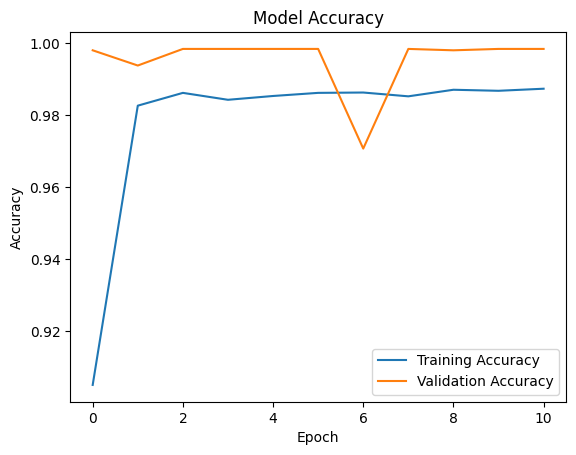

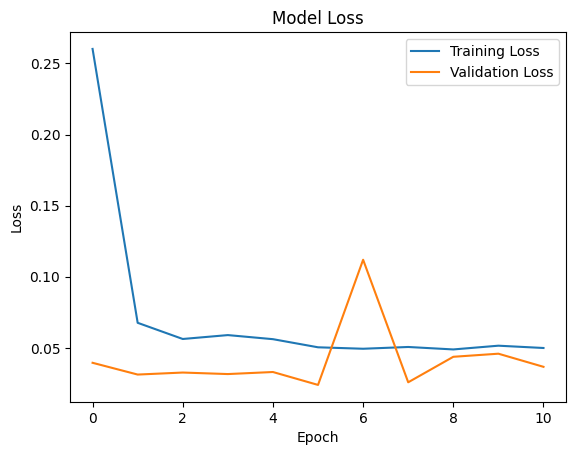

In [35]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()



### 1.7 Conclusiones

Primer dataset: 

Al final de toda la primera parte del proyecto con respecto a este dataset pudimos concluir que con lo visto en clase se pueden hacer buenos modelos de predicción de series, esto en específico con la demanda de la empresa brasileña, ¿esto que nos puede decir? Que en nuestra ciudad o en el país donde hay muchas empres PYMES podemos implementar los modelos aprendidos durante clase con los datos que estas empresas trabajan, o ya si nosotros o alguno de nuestros compañeros planea hacer su propia empresa poder usar lo aprendido para poder crecer su empresa.

Segundo dataset: 

Con este dataset en específico que fue para clasificar si una vivienda estaba habitada o no nos dice mucho con respecto a los modelos de clasificación con series de tiempo, ya que si el modelo de Deep learning usado da buen resultado en las métricas creemos que a veces podría ser mejor usar otro modelo de clasificación de ML, ya sea modelos de árboles o de clusters, esto ya que no se proporciona tantos datos y esto para un modelo de Deep learning puede ser perjudicial, pero para uno de ML se puede interpretar más fácil.
